# 🧠 Module 01: Linear Regression (STANDARD CS229)

**CS229 Part I – Supervised Learning**

---
## 📖 0. Definition & When to Use

### What is Linear Regression?

At its core, **Linear Regression** is a supervised learning algorithm used to predict **continuous values** by assuming a linear relationship between the input features and the output.

In other words, we are saying:  
“If I change the inputs a little, the output should change in a predictable, linear way.”

Formally, we write this as:
  
**Formula:**  
$y = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n + \epsilon$

Here, each parameter $\theta_j$ controls how much its corresponding feature $x_j$ influences the prediction, while $\epsilon$ captures everything the model cannot explain.

**Key Assumptions:**
1. Linearity between features (X) and target (y)
2. Residuals are normally distributed
3. Homoscedasticity, meaning the variance of residuals is constant
4. No multicollinearity between features (for multiple linear regression)

These assumptions are not just theory. They directly affect how well linear regression works in practice.

---

### 🎯 When to Use Linear Regression?

So when is linear regression a good idea, and when should you avoid it?

| Scenario                          | ✅ Use It                                      | ❌ Avoid It                                      |
|-----------------------------------|-----------------------------------------------|------------------------------------------------|
| **Predicting continuous values** | ✅ House prices, temperature, sales revenue   | ❌ Spam classification (binary outcomes)       |
| **Clear linear relationship**    | ✅ Height vs. body weight                     | ❌ Image recognition (highly non-linear)       |
| **Interpretability matters**     | ✅ Business reports, scientific research      | ❌ When only raw accuracy is the goal          |
| **Small-to-medium datasets**     | ✅ < 10K samples, < 100 features              | ❌ Very large data (prefer SGD-based methods)  |

A good mental model is this: linear regression shines when the signal is simple and the explanation matters.

---

### 🌍 Real-World Examples

You will see linear regression everywhere once you know what to look for:

🏠 **Real Estate**: Predict house prices based on size, location, and number of bedrooms  
📈 **Finance**: Forecast revenue from marketing spend and seasonal effects  
🌡️ **Meteorology**: Predict temperature using humidity, pressure, and wind speed  
🏥 **Healthcare**: Estimate treatment costs from patient demographics  

In many of these cases, linear regression is not the final model, but it is often the first one you try.

---

**💡 Rule of Thumb**

- Linear models (Linear, Logistic, Softmax) are **interpretable, fast, and strong baselines**
- Non-linear models (SVMs, Neural Networks) usually offer **higher accuracy but lower interpretability**
- Always start simple, understand the data, and only add complexity if the problem truly demands it

This mindset alone will save you a lot of time and unnecessary modeling pain.

---

## 📖 1. Introduction: The Supervised Learning Framework

Alright, welcome to the very first module.

Following CS229, we begin exactly where most of modern machine learning begins: **supervised learning**.

Imagine we are given a dataset of housing prices in Portland, Oregon. For each house, we know the land area, which we will treat as our input feature $x$, and the corresponding selling price, which is our target output $y$. Our goal is to *learn from this data* so that we can accurately predict the price of a house we have never seen before.

Here is how the supervised learning process works at a high level:
1. We provide a **Training Set** to a **Learning Algorithm**.
2. The algorithm produces a function called the **Hypothesis** ($h$).
3. The hypothesis function $h$ takes an input $x$ (land area) and outputs a predicted value $\hat{y}$ (price).

In this module, we focus on the simplest yet most fundamental supervised learning model: **Linear Regression**. We will assume that the target variable $y$ can be expressed as a linear combination of the input features.

This assumption may look humble, but it turns out to be incredibly powerful.

---

## 🗣️ 2. Formula Pronunciation Guide (CS229 Standard)

Before we go any further, let’s make sure we speak the same mathematical language. If you want to sound fluent in ML discussions and research settings, these are the standard CS229 pronunciations:

| Symbol | How to Read | Meaning |
|---|---|---|
| $x^{(i)}$ | “x superscript i” | The $i$-th training example (not an exponent!) |
| $\theta^T$ | “theta transpose” | Weight vector flipped into a row |
| $h_\theta(x)$ | “hypothesis h sub theta of x” | Prediction function |
| $J(\theta)$ | “cost function J of theta” | Error function we want to minimize |
| $\nabla$ | “nabla” or “del” | Gradient (vector of partial derivatives) |
| $\alpha$ | “alpha” | Learning rate (step size) |

Getting comfortable with this notation early will save you a lot of cognitive load later.

---

## 📊 3. The Statistical Story (Gaussian Assumption)

You might be wondering:  
Why do we use *least squares*?  
Why squared error, and not absolute error or something else?

Here’s where the statistics come in.

We assume the relationship between input and output looks like this:
$$ y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)} $$

The term $\epsilon^{(i)}$ is just noise. It represents everything we cannot predict perfectly: measurement errors, missing variables, randomness in the world.

Our key assumption is that this noise follows a **Normal (Gaussian)** distribution with mean 0 and variance $\sigma^2$:
$$ \epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2) $$

Now here’s the cool part.

If we ask:  
“What value of $\theta$ makes the observed data most likely under this Gaussian noise assumption?”

The math turns out to be **exactly the same as** minimizing the sum of squared errors.

This is one of those beautiful moments in machine learning where probability theory and optimization line up perfectly. Least squares is not arbitrary at all. It drops straight out of our statistical assumptions.

---

## 📐 4. Mathematical Breakdown: The LMS Algorithm

With that foundation in place, let’s write down what we are actually optimizing.

Our goal is to choose $\theta$ that minimizes the cost function $J(\theta)$:
$$ J(\theta) = \frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2 $$

This measures how wrong our predictions are, averaged over the training set.

### C. Deriving Gradient Descent (LMS Update Rule)

Alright, now for the heart of the algorithm.

We want to update a single parameter $\theta_j$ in a direction that reduces the error. To figure out which direction to move, we take a partial derivative:
$$ \frac{\partial}{\partial \theta_j} J(\theta) $$

To keep things simple, let’s derive this for a single data point first (the stochastic case).

Define the prediction error as:
$$ u = h_\theta(x) - y $$
and consider the function:
$$ f(u) = \frac{1}{2} u^2 $$

Now we apply the chain rule step by step:

1. **Outer derivative:**  
   $$ \frac{d}{du}\left(\frac{1}{2}u^2\right) = u = \big(h_\theta(x) - y\big) $$

2. **Inner derivative:**  
   $$ \frac{\partial u}{\partial \theta_j} = \frac{\partial}{\partial \theta_j}(\theta^T x - y) = x_j $$

3. **Chain rule:**  
   Multiply them together:
   $$ (h_\theta(x) - y)\, x_j $$

Putting it all together, we get the **Least Mean Squares (LMS)** update rule:
$$ \theta_j := \theta_j - \alpha \big(h_\theta(x^{(i)}) - y^{(i)}\big) x_j^{(i)} $$

*(Note: this is identical to the Widrow–Hoff rule.)*

### D. Anatomy of the Update Rule (Deep Dive)

So why does this update rule make sense?

Let’s rewrite it with meaning attached to each part:
$$ \theta_j := \theta_j \underbrace{- \alpha}_{\text{Step size}} \underbrace{(h_\theta(x) - y)}_{\text{Error}} \underbrace{x_j}_{\text{Input}} $$

Now let’s unpack the intuition.

1. **Error term $(h - y)$**  
   - If the prediction is too high ($h > y$), the error is positive. We want to decrease $\theta$ so the prediction goes down.
   - If the prediction is too low ($h < y$), the error is negative. We want to increase $\theta$ so the prediction goes up.

2. **Input feature $x_j$**  
   - If $x_j$ is large and positive, even a small change in $\theta_j$ has a big effect on the prediction (since $h = \dots + \theta_j x_j$). That means we should correct $\theta_j$ more aggressively.
   - If $x_j$ is negative, the relationship flips. Increasing $\theta_j$ actually decreases $h$. Multiplying by $x_j$ automatically handles this sign reversal.

3. **Physical intuition**  
   - This update rule automatically figures out both the **direction** (increase or decrease) and the **magnitude** (how much to change) of the correction, based on how wrong the prediction is and how sensitive it is to that parameter.

Pretty elegant, right?

---

## 💻 5. Implementation from Scratch (Pure NumPy)

Finally, let’s connect the math to code.

We will implement **Batch Gradient Descent**, where all training examples are used at once. In vectorized form, the gradient becomes:
$$ \nabla_\theta J = X^T (X\theta - y) $$


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. SUPERVISED LEARNING SETUP

np.random.seed(42)  # reproducibility
m = 100             # number of training examples

# single feature: land area (kept small to avoid scaling issues)
X = 2 * np.random.rand(m, 1)

# ground truth: y = 4 + 3x + noise
# noise models everything we can't explain
y = 4 + 3 * X + np.random.randn(m, 1)

# bias trick: prepend x0 = 1 so theta0 is learned like other parameters
X_b = np.c_[np.ones((m, 1)), X]

print(f"Dataset: {m} training examples")
print("Shape of X_b:", X_b.shape)


Dataset: 100 training examples
Shape of X_b: (100, 2)


In [8]:
# 2. BUILDING THE MODEL (FROM SCRATCH)

def hypothesis(X, theta):
    """h(x) = X @ theta"""
    return X @ theta


def compute_cost(X, y, theta):
    """J(theta) = (1/2m) * sum((h(x) - y)^2)"""
    m = len(y)
    errors = hypothesis(X, theta) - y
    # 1/2 simplifies the gradient of the square term
    return np.sum(errors ** 2) / (2 * m)


def gradient_descent(X, y, theta, alpha, n_iterations):
    """run gradient descent, return final theta and history"""
    m = len(y)
    cost_history = []
    theta_history = []

    for _ in range(n_iterations):
        # forward pass
        errors = X @ theta - y

        # analytic gradient: dJ/dtheta = (1/m) * X^T @ errors
        grad = X.T @ errors / m

        # gradient points uphill, so we subtract
        theta = theta - alpha * grad

        # bookkeeping
        cost = np.sum(errors ** 2) / (2 * m)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)


In [9]:
# 3. TRAINING LOOP

# initialize at zero so the optimization path is easy to visualize
theta_init = np.zeros((2, 1))

# learning rate:
# too large -> diverges, too small -> slow
# 0.1 works well here because the feature scale is small
alpha = 0.1

n_iterations = 1000

print("Starting training...")
theta_final, loss_history, theta_history = gradient_descent(
    X_b, y, theta_init, alpha, n_iterations
)

print("\nFinal theta:", theta_final.ravel())
print("Target (ideal): [4, 3]")


Starting training...

Final theta: [4.21509612 2.77011342]
Target (ideal): [4, 3]


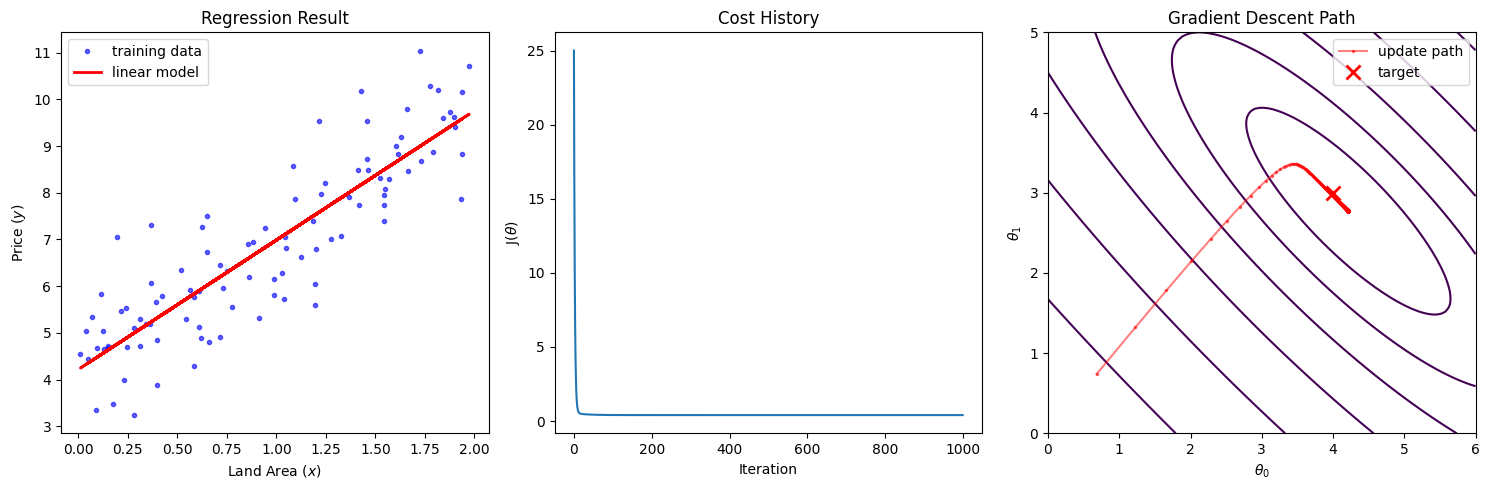

In [12]:
# 4. VISUALIZATION OF RESULTS & CONTOUR PLOT

plt.figure(figsize=(15, 5))

# A. data and fitted line
plt.subplot(1, 3, 1)
plt.plot(X, y, "b.", alpha=0.6, label="training data")
plt.plot(X, X_b @ theta_final, "r-", linewidth=2, label="linear model")
plt.xlabel("Land Area ($x$)")
plt.ylabel("Price ($y$)")
plt.title("Regression Result")
plt.legend()

# B. cost over iterations
plt.subplot(1, 3, 2)
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("J($\\theta$)")
plt.title("Cost History")

# C. cost surface and optimization path
plt.subplot(1, 3, 3)

t0_range = np.linspace(0, 6, 100)
t1_range = np.linspace(0, 5, 100)
T0, T1 = np.meshgrid(t0_range, t1_range)
J_vals = np.zeros_like(T0)

for i in range(len(t0_range)):
    for j in range(len(t1_range)):
        theta = np.array([[t0_range[i]], [t1_range[j]]])
        J_vals[j, i] = compute_cost(X_b, y, theta)  # row-major order

plt.contour(
    T0, T1, J_vals,
    levels=np.logspace(-2, 3, 20),
    cmap="viridis"
)

plt.xlabel("$\\theta_0$")
plt.ylabel("$\\theta_1$")
plt.title("Gradient Descent Path")

plt.plot(
    theta_history[:, 0],
    theta_history[:, 1],
    "r.-",
    alpha=0.5,
    markersize=3,
    label="update path"
)

plt.plot(4, 3, "rx", markersize=10, markeredgewidth=2, label="target")

plt.legend()
plt.tight_layout()
plt.show()


---

## 🚁 6. Normal Equation (Closed-Form Solution)

### 6.1 Introduction: Walking vs. Helicopter

Alright, so far we've been using gradient descent to find our optimal parameters. But there's actually another way – a shortcut that skips all the iteration entirely.

Let me give you an analogy that makes this super clear.

Imagine you're trying to reach the lowest point in a mountain valley (that's our minimum error):
- **Gradient Descent (GD)** is like **walking** downhill. You look around, find the steepest downward slope, take a small step, then repeat. It works, but you might need thousands of steps to reach the bottom.
- **Normal Equation** is like taking a **helicopter**. You fly up, survey the entire landscape from above, do some precise math to calculate the exact coordinates of the lowest point, and then **parachute directly** down to it. Done. One shot.

The Normal Equation gives us the **exact solution** without any iterative looping. Pretty cool, right?

### 6.2 Complete Step-by-Step Derivation

Now here's the thing – how do we actually derive this "helicopter" formula? We need some matrix calculus, but don't worry, we'll walk through each step carefully.

**Step 1: Write the Cost Function in Matrix Form**  

Recall our cost function: $J(\theta) = \frac{1}{2} \sum (h_\theta(x^{(i)}) - y^{(i)})^2$. 

When we write this using vectors and matrices, the sum of squared errors becomes:
$$ J(\theta) = \frac{1}{2} (X\theta - y)^T (X\theta - y) $$

This is just a compact way of saying "take all our predictions, subtract all our actual values, and sum up the squares."

**Step 2: Expand the Quadratic Form (Distributive Property)**  

Let's expand this carefully. Using transpose rules $(A-B)^T = A^T - B^T$ and $(AB)^T = B^T A^T$:
$$ J(\theta) = \frac{1}{2} (\theta^T X^T - y^T)(X\theta - y) $$

Now multiply this out:
$$ J(\theta) = \frac{1}{2} (\theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y) $$

Here's a nice trick: $\theta^T X^T y$ is actually just a scalar (a single number). And for scalars, taking the transpose does nothing – so $\theta^T X^T y = y^T X \theta$. This means the middle terms combine:
$$ J(\theta) = \frac{1}{2} (\theta^T X^T X \theta - 2\theta^T X^T y + y^T y) $$

**Step 3: Take the Gradient with Respect to $\theta$**  

Okay, math time. We need to take derivatives with respect to $\theta$. Using matrix calculus rules:
- $\nabla_\theta (\theta^T A \theta) = 2A\theta$ (when $A$ is symmetric, like $X^T X$)
- $\nabla_\theta (c^T \theta) = c$

Applying these:
$$ \nabla_\theta J(\theta) = \frac{1}{2} (2 X^T X \theta - 2 X^T y) = X^T X \theta - X^T y $$

The $\frac{1}{2}$ and the 2's cancel out nicely!

**Step 4: Set Gradient to Zero and Solve**  

At the minimum, the gradient must be zero (that's calculus 101):
$$ X^T X \theta - X^T y = 0 $$
$$ X^T X \theta = X^T y $$

Now just solve for $\theta$ by multiplying both sides by the inverse of $(X^T X)$:
$$ \theta = (X^T X)^{-1} X^T y $$

🎯 **Final Result (Normal Equation):**
$$ \theta = (X^T X)^{-1} X^T y $$

And that's it! This formula gives you the optimal parameters directly.

### 6.3 Geometric Interpretation (Flashlight Analogy)

Let me give you some geometric intuition, because this is actually pretty beautiful.

Imagine the target vector $y$ floating somewhere in space. The columns of matrix $X$ span a flat "plane" (technically, a subspace). We want to find the linear combination $X\theta$ that gets as close as possible to $y$.

Now here's the key insight: the shortest distance from a point to a plane is always **perpendicular** to that plane. It's like if you shine a flashlight straight down from the tip of $y$ onto the plane spanned by $X$ – the shadow you see is your best prediction $X\theta$. The error $y - X\theta$ is that perpendicular beam of light.

This is what mathematicians call **orthogonal projection**. The Normal Equation is literally computing this projection for us.

### 6.4 When $X^T X$ Is Not Invertible (Singular)?

Alright, so what happens when the "helicopter breaks"? Sometimes the matrix $(X^T X)$ has no inverse, and our formula fails. This happens in two main scenarios:

**1. Multicollinearity (Redundant Features):**  
This is when your features are perfectly correlated with each other.

*Example:* Say $x_1$ is house area in square feet, and $x_2$ is house area in square meters. These are just scaled versions of each other! The matrix becomes rank-deficient (redundant information).

*Numeric Example:* If $X = [[1, 2], [2, 4]]$, notice the second row is just double the first. The determinant is 0, so there's no inverse.

*Solution:* Remove one of the redundant features.

**2. More Features Than Samples ($n > m$):**  
When you have too many parameters relative to data points, you get infinitely many solutions. It's like trying to draw a unique line through a single point – you can't!

*Solution:* Either reduce the number of features or use regularization (we'll cover this later).

### 6.5 Comparison: Gradient Descent vs. Normal Equation

So when should you use which approach? Here's the breakdown:

| Feature                  | Gradient Descent 🚶                  | Normal Equation 🚁                     |
|--------------------------|--------------------------------------|----------------------------------------|
| **Learning Rate ($\alpha$)** | Requires careful tuning             | **Not needed** – no hyperparameters!   |
| **Iterations**           | Requires many loops (could be thousands) | None (one-shot calculation)           |
| **Feature Scaling**      | **Required** for fast convergence    | Not needed                             |
| **Complexity**           | $O(kn^2)$ (scales well with large $n$) | $O(n^3)$ (slow for large $n$)          |
| **Best for**             | $n > 10,000$ (Big Data)              | $n < 10,000$ (Small-to-Medium Data)    |

The key tradeoff is this: Normal Equation is exact but slow for large feature sets (computing that matrix inverse is expensive). Gradient Descent scales better to huge datasets but requires tuning and iteration.

In modern deep learning with millions of parameters, we basically always use gradient descent variants. But for small classical ML problems? Normal Equation can be beautifully simple.

### 6.6 Manual Numerical Example

Let's actually compute this by hand to make it concrete.

**Setup:** 3 houses ($m=3$), 1 feature (size) + bias term.

$X$ (with bias column) = $[[1, 1], [1, 2], [1, 3]]$  
$y$ = $[1, 2, 3]$

**Step 1: Compute $X^T X$:**  
$X^T X = [[3, 6], [6, 14]]$

**Step 2: Find the Inverse $(X^T X)^{-1}$:**  
Determinant = $3 \times 14 - 6 \times 6 = 42 - 36 = 6$

Using the 2×2 inverse formula:
$(X^T X)^{-1} = \frac{1}{6} [[14, -6], [-6, 3]] \approx [[2.333, -1], [-1, 0.5]]$

**Step 3: Compute $X^T y$:**  
$X^T y = [6, 14]$

**Step 4: Multiply to Get $\theta$:**  
$\theta = [[2.333 \times 6 - 1 \times 14], [-1 \times 6 + 0.5 \times 14]] = [[0], [1]]$

**Result:** Intercept = 0, Slope = 1

So our model is $h_\theta(x) = 0 + 1 \cdot x$, which perfectly fits the points (1,1), (2,2), (3,3). Makes sense, right? It's just the line $y = x$!

---

Pretty elegant how that worked out. The Normal Equation gave us the exact answer in one calculation – no learning rate to tune, no wondering if we've converged. That's the power of the closed-form solution.

In [13]:
def normal_equation(X, y):
    """theta = (X^T X)^-1 X^T y"""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# compare with gradient descent result
theta_ne = normal_equation(X_b, y)
print("Normal Equation:", theta_ne.ravel())
print("Gradient Descent:", theta_final.ravel())
# should be identical (within floating point precision)

Normal Equation: [4.21509616 2.77011339]
Gradient Descent: [4.21509612 2.77011342]


In [14]:
# ═══════════════════════════════════════════════════════════════
# SECTION 6: BENCHMARK - Normal Equation vs Gradient Descent
# ═══════════════════════════════════════════════════════════════
import numpy as np
import time

def normal_equation(X, y):
    """theta = (X^T X)^-1 X^T y"""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def gradient_descent_timed(X, y, alpha=0.01, iters=1000):
    """run GD for timing comparison"""
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(iters):
        grad = X.T.dot(X.dot(theta) - y) / m
        theta = theta - alpha * grad
    return theta

# benchmark across different feature counts
n_features = [10, 50, 100, 500, 1000]
m = 1000
results = {'n': [], 'gd_time': [], 'ne_time': []}

print("Benchmarking GD vs Normal Equation...")
print("="*50)

for n in n_features:
    np.random.seed(42)
    X = np.random.randn(m, n)
    X = np.c_[np.ones((m, 1)), X]  # add bias
    y = np.random.randn(m, 1)
    
    # time gradient descent
    start = time.time()
    theta_gd = gradient_descent_timed(X, y, alpha=0.01, iters=100)
    gd_time = time.time() - start
    
    # time normal equation
    start = time.time()
    theta_ne = normal_equation(X, y)
    ne_time = time.time() - start
    
    results['n'].append(n)
    results['gd_time'].append(gd_time)
    results['ne_time'].append(ne_time)
    
    winner = 'GD' if gd_time < ne_time else 'Normal Eq'
    print(f"n={n:4d} | GD: {gd_time:.4f}s | NE: {ne_time:.4f}s | Winner: {winner}")

print("="*50)
print("Watch the crossover point where Normal Equation becomes slower!")

Benchmarking GD vs Normal Equation...
n=  10 | GD: 0.0420s | NE: 0.0000s | Winner: Normal Eq
n=  50 | GD: 0.0311s | NE: 0.0119s | Winner: Normal Eq
n= 100 | GD: 0.0317s | NE: 0.0360s | Winner: GD
n= 500 | GD: 0.0341s | NE: 0.1493s | Winner: GD
n=1000 | GD: 0.0443s | NE: 0.4655s | Winner: GD
Watch the crossover point where Normal Equation becomes slower!


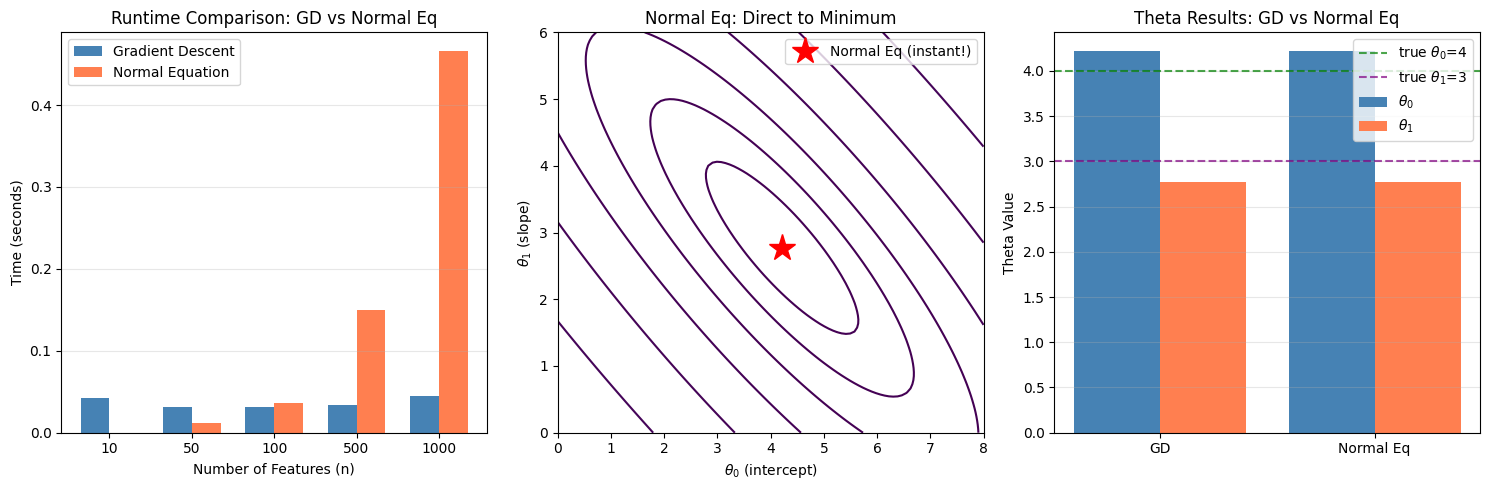

In [15]:
# visualization: runtime comparison
plt.figure(figsize=(15, 5))

# plot 1: bar chart runtime
plt.subplot(1, 3, 1)
x_pos = np.arange(len(results['n']))
width = 0.35
plt.bar(x_pos - width/2, results['gd_time'], width, label='Gradient Descent', color='steelblue')
plt.bar(x_pos + width/2, results['ne_time'], width, label='Normal Equation', color='coral')
plt.xlabel('Number of Features (n)')
plt.ylabel('Time (seconds)')
plt.title('Runtime Comparison: GD vs Normal Eq')
plt.xticks(x_pos, results['n'])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# plot 2: contour with normal equation solution
plt.subplot(1, 3, 2)
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

# create cost function contour
t0_range = np.linspace(0, 8, 100)
t1_range = np.linspace(0, 6, 100)
T0, T1 = np.meshgrid(t0_range, t1_range)
J_vals = np.zeros(T0.shape)
for i in range(len(t0_range)):
    for j in range(len(t1_range)):
        t = np.array([[t0_range[i]], [t1_range[j]]])
        J_vals[j, i] = np.sum((X_b.dot(t) - y)**2) / (2*m)

plt.contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
theta_ne = normal_equation(X_b, y)
plt.plot(theta_ne[0], theta_ne[1], 'r*', markersize=20, label='Normal Eq (instant!)')
plt.xlabel(r'$\theta_0$ (intercept)')
plt.ylabel(r'$\theta_1$ (slope)')
plt.title('Normal Eq: Direct to Minimum')
plt.legend()

# plot 3: theta comparison
plt.subplot(1, 3, 3)
theta_gd = gradient_descent_timed(X_b, y, alpha=0.1, iters=1000)
methods = ['GD', 'Normal Eq']
theta0_vals = [theta_gd[0,0], theta_ne[0,0]]
theta1_vals = [theta_gd[1,0], theta_ne[1,0]]
x_pos = np.arange(2)
plt.bar(x_pos - 0.2, theta0_vals, 0.4, label=r'$\theta_0$', color='steelblue')
plt.bar(x_pos + 0.2, theta1_vals, 0.4, label=r'$\theta_1$', color='coral')
plt.axhline(y=4, color='green', linestyle='--', alpha=0.7, label='true $\\theta_0$=4')
plt.axhline(y=3, color='purple', linestyle='--', alpha=0.7, label='true $\\theta_1$=3')
plt.xticks(x_pos, methods)
plt.ylabel('Theta Value')
plt.title('Theta Results: GD vs Normal Eq')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 🔍 Interpreting the Benchmark Results

**Runtime Table:**
- Watch how Normal Equation starts fast but slows down as features increase
- The crossover point is where GD becomes faster (usually around n=1000)
- Why? Matrix inversion is $O(n^3)$ – it doesn't scale well

**Graph 1: Runtime Bars**
- Blue = Gradient Descent, Orange = Normal Equation
- Notice how orange bars grow exponentially while blue stays relatively flat
- This is the "helicopter vs walking" tradeoff visualized

**Graph 2: Cost Function Contour**
- Red star shows where Normal Equation lands – dead center, first try
- No wandering around, no iterations, just pure linear algebra
- This is why it's exact (when it works)

**Graph 3: Theta Values**
- Both methods should give nearly identical results
- Dashed lines = true values we generated the data from
- If they don't match, something's wrong (bad learning rate, not enough iterations, etc.)

**💡 Rule of Thumb:** 
- n < 10,000 → Normal Equation (fast, exact)
- n > 10,000 → Gradient Descent (scales better)
- In modern deep learning with millions of parameters, we pretty much always use GD variants

---

## ⚖️ 7. Feature Scaling & Normalization

### 7.1 Why Scale? The Ant vs. Elephant Problem

Alright, here's a situation that'll make the problem crystal clear.

Imagine organizing a relay race with an **ant** (0.1 cm steps) and an **elephant** (100 cm steps). They're both trying to reach the same finish line. The elephant gets there in one stride. The ant? 1,000 tiny steps. Total chaos.

This exact same problem happens in machine learning when features have wildly different scales. Say $x_1$ ranges from 0–1 (the ant) and $x_2$ ranges from 0–10,000 (the elephant). Gradient Descent will absolutely struggle.

**Real example with housing data:**
- $x_1$ (Area): 1,000 – 3,000 sq ft
- $x_2$ (Bedrooms): 1 – 5 rooms

Now here's what happens: $\theta_1$ (for area) has to be tiny (maybe ~0.1) because the input values are huge, while $\theta_2$ (for bedrooms) has to be massive (maybe ~500) just to have any impact. The parameters end up living in completely different universes, and gradient descent has a really hard time navigating this.

### 7.2 The Visual Problem: Elongated Contours

**Without scaling:**
- The cost function contour becomes a **thin, elongated ellipse** (picture a cucumber)
- Gradient Descent follows a painful **zig-zag** path – it bounces back and forth in the steep direction while barely making progress toward the actual minimum
- Result: painfully slow convergence

**With scaling:**
- The contour becomes a **nice, symmetric bowl** (almost circular)
- Gradient Descent can head straight toward the minimum
- Result: fast, clean convergence

This is one of those things where seeing the visualization makes it click instantly.

### 7.3 The Four Main Scaling Methods

Let's work through a concrete example: $x = [1000, 1500, 2000]$  
Stats: mean $\mu = 1500$, std $\sigma = 500$, min = 1000, max = 2000

**a) Standardization (Z-Score) 🏆 [This is usually what you want]**

Formula:
$$ x' = \frac{x - \mu}{\sigma} $$

Transforms data to mean 0 and standard deviation 1.

Example: $(1000 - 1500)/500 = -1$ → Result: $[-1, 0, 1]$

**When to use:** This should be your default for gradient descent-based algorithms (Linear/Logistic Regression, Neural Networks, SVM). It's the standard for a reason.

**b) Min-Max Scaling**

Formula:
$$ x' = \frac{x - \min}{\max - \min} $$

Squashes everything into the range [0, 1].

Example: $(1500 - 1000)/(2000 - 1000) = 0.5$ → Result: $[0, 0.5, 1]$

**When to use:** Image processing (pixel values 0–255 → 0–1), or when you specifically need a bounded range.

**c) Mean Normalization**

Formula:
$$ x' = \frac{x - \mu}{\max - \min} $$

Centers at 0 but uses the range instead of standard deviation.

Example: $(1000 - 1500)/1000 = -0.5$ → Range around [-0.5, 0.5]

**d) Robust Scaling**

Formula:
$$ x' = \frac{x - \text{median}}{\text{IQR}} $$

Uses median and interquartile range instead of mean/std – makes it resistant to outliers.

**When to use:** When you have crazy outliers (think: employee salaries including the CEO's $50M).

### 7.4 When You DON'T Need Scaling

Tree-based algorithms (Decision Trees, Random Forest, XGBoost) are **scale-invariant**. They only care about splits like "is $x > 1500$?" – the actual magnitude doesn't matter. Same with Naive Bayes.

So if you're using trees, you can skip this whole section.

### 7.5 Critical Mistake: Data Leakage ⚠️

Here's a mistake that trips up a lot of people:

**Wrong:** Compute scaling parameters ($\mu$, $\sigma$, min, max) from the entire dataset, then split into train/test.

**Right:** 
1. Split your data into train and test sets FIRST
2. Compute scaling parameters using ONLY the training set
3. Apply those same parameters to both train and test

Why? Because in the real world, you won't have access to future test data when you're training. You need to learn the scaling from training data only, then apply it consistently.

This simulates actual deployment – you'll be scaling new data using statistics learned only from your past data.

---

Alright, with features properly scaled, gradient descent will converge way faster. Let's see this in action.

In [16]:
def standard_scaler(X):
    """z-score: (x - mu) / sigma"""
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_scaled = (X - mu) / sigma
    return X_scaled, mu, sigma

# example with an outlier
raw_data = np.array([[1000], [1500], [2000], [5000]])
X_std, mu, sigma = standard_scaler(raw_data)

print("Original:", raw_data.ravel())
print(f"Stats: mean={mu[0]:.2f}, std={sigma[0]:.2f}")
print("Scaled:", X_std.ravel())
# now centered at 0 with std ~1

Original: [1000 1500 2000 5000]
Stats: mean=2375.00, std=1556.24
Scaled: [-0.88354126 -0.56225353 -0.2409658   1.68676059]


In [17]:
# ═══════════════════════════════════════════════════════════════
# SECTION 7: Feature Scaling - 4 Methods
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# different scales: area (1000-5000) vs rooms (1-5)
area = np.random.uniform(1000, 5000, 100).reshape(-1, 1)
rooms = np.random.uniform(1, 5, 100).reshape(-1, 1)
X_raw = np.hstack([area, rooms])

def standardization(X):
    """(x - mu) / sigma"""
    return (X - X.mean(axis=0)) / X.std(axis=0)

def minmax_scaling(X):
    """(x - min) / (max - min)"""
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def mean_normalization(X):
    """(x - mu) / (max - min)"""
    return (X - X.mean(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def robust_scaling(X):
    """(x - median) / IQR"""
    median = np.median(X, axis=0)
    q75, q25 = np.percentile(X, [75, 25], axis=0)
    iqr = q75 - q25
    return (X - median) / iqr

X_std = standardization(X_raw)
X_mm = minmax_scaling(X_raw)
X_mean = mean_normalization(X_raw)
X_robust = robust_scaling(X_raw)

print("Before scaling:")
print(f"Area  - mean: {area.mean():.1f}, std: {area.std():.1f}, range: [{area.min():.0f}, {area.max():.0f}]")
print(f"Rooms - mean: {rooms.mean():.2f}, std: {rooms.std():.2f}, range: [{rooms.min():.1f}, {rooms.max():.1f}]")
print("\nAfter standardization:")
print(f"Area  - mean: {X_std[:,0].mean():.4f}, std: {X_std[:,0].std():.4f}")
print(f"Rooms - mean: {X_std[:,1].mean():.4f}, std: {X_std[:,1].std():.4f}")
print("\nBoth features now on the same scale!")

Before scaling:
Area  - mean: 2880.7, std: 1184.0, range: [1022, 4948]
Rooms - mean: 2.99, std: 1.17, range: [1.0, 4.9]

After standardization:
Area  - mean: 0.0000, std: 1.0000
Rooms - mean: -0.0000, std: 1.0000

Both features now on the same scale!


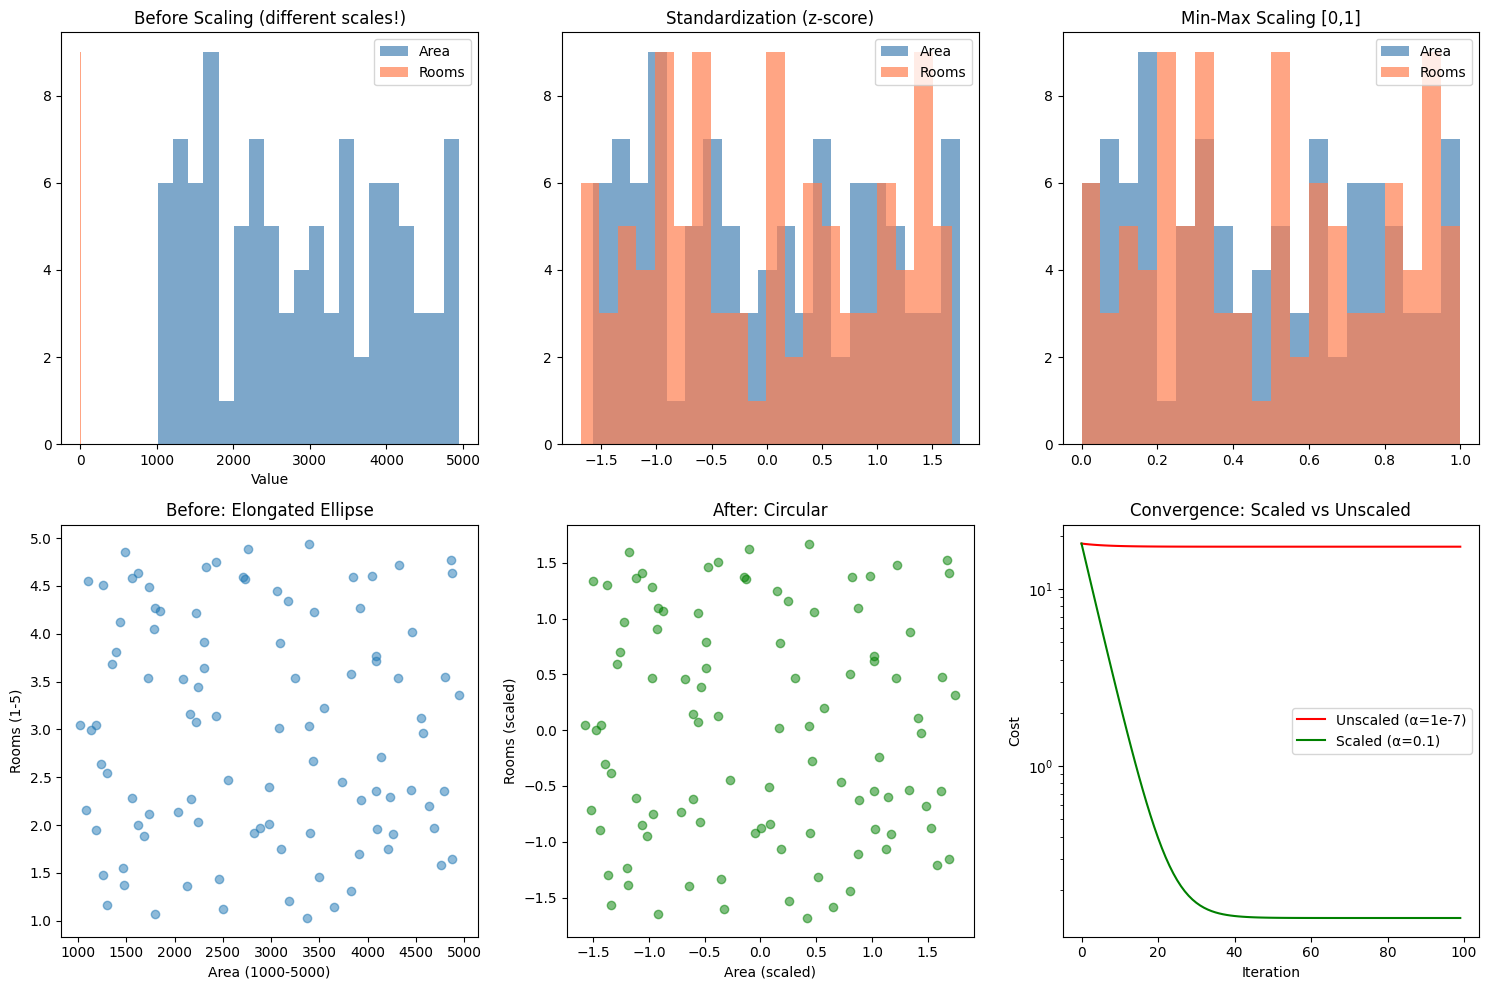

In [18]:
# visualization: feature scaling comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# row 1: distributions
axes[0, 0].hist(X_raw[:,0], bins=20, alpha=0.7, color='steelblue', label='Area')
axes[0, 0].hist(X_raw[:,1], bins=20, alpha=0.7, color='coral', label='Rooms')
axes[0, 0].set_title('Before Scaling (different scales!)')
axes[0, 0].legend()
axes[0, 0].set_xlabel('Value')

axes[0, 1].hist(X_std[:,0], bins=20, alpha=0.7, color='steelblue', label='Area')
axes[0, 1].hist(X_std[:,1], bins=20, alpha=0.7, color='coral', label='Rooms')
axes[0, 1].set_title('Standardization (z-score)')
axes[0, 1].legend()

axes[0, 2].hist(X_mm[:,0], bins=20, alpha=0.7, color='steelblue', label='Area')
axes[0, 2].hist(X_mm[:,1], bins=20, alpha=0.7, color='coral', label='Rooms')
axes[0, 2].set_title('Min-Max Scaling [0,1]')
axes[0, 2].legend()

# row 2: scatter plots (contour shape)
axes[1, 0].scatter(X_raw[:,0], X_raw[:,1], alpha=0.5)
axes[1, 0].set_xlabel('Area (1000-5000)')
axes[1, 0].set_ylabel('Rooms (1-5)')
axes[1, 0].set_title('Before: Elongated Ellipse')
axes[1, 0].set_aspect('auto')

axes[1, 1].scatter(X_std[:,0], X_std[:,1], alpha=0.5, color='green')
axes[1, 1].set_xlabel('Area (scaled)')
axes[1, 1].set_ylabel('Rooms (scaled)')
axes[1, 1].set_title('After: Circular')
axes[1, 1].set_aspect('equal')

# convergence comparison
np.random.seed(42)
m = 100
X_conv = np.random.randn(m, 2) * [1000, 1]  # unscaled
X_conv_b = np.c_[np.ones((m,1)), X_conv]
y_conv = 5 + 2*X_conv[:,0:1]/1000 + 3*X_conv[:,1:2] + np.random.randn(m,1)*0.5

def gd_track(X, y, alpha, iters):
    """run GD and track cost history"""
    m, n = X.shape
    theta = np.zeros((n,1))
    costs = []
    for _ in range(iters):
        cost = np.sum((X.dot(theta) - y)**2) / (2*m)
        costs.append(cost)
        grad = X.T.dot(X.dot(theta) - y) / m
        theta = theta - alpha * grad
    return costs

X_scaled_conv = standardization(X_conv)
X_scaled_conv_b = np.c_[np.ones((m,1)), X_scaled_conv]

costs_unscaled = gd_track(X_conv_b, y_conv, 0.0000001, 100)
costs_scaled = gd_track(X_scaled_conv_b, y_conv, 0.1, 100)

axes[1, 2].plot(costs_unscaled, label='Unscaled (α=1e-7)', color='red')
axes[1, 2].plot(costs_scaled, label='Scaled (α=0.1)', color='green')
axes[1, 2].set_xlabel('Iteration')
axes[1, 2].set_ylabel('Cost')
axes[1, 2].set_title('Convergence: Scaled vs Unscaled')
axes[1, 2].legend()
axes[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

### 🔍 Interpreting the Scaling Results

**Statistics Output:**
- Before: Area has mean ~3000, rooms has mean ~3 – completely different universes
- After standardization: Both features have mean ≈ 0, std ≈ 1
- This is exactly what we want – features on the same scale

**Row 1: Distribution Histograms**
- Left panel: The histograms don't even overlap – area is in the thousands, rooms in single digits
- Middle/Right panels: Now they're comparable ranges, both centered around similar values
- You can actually see both features in the same plot now

**Row 2: Scatter Plots (The Money Shot)**
- Before: That elongated ellipse is the problem visualized – gradient descent has to take tiny steps in one direction and huge steps in another
- After: Nice circular distribution – gradient descent can use the same step size in all directions
- This is the "cucumber vs bowl" difference from the theory section

**Convergence Plot:**
- Red (unscaled): Had to use α=1e-7 (ridiculously tiny) and still converges slowly
- Green (scaled): Used α=0.1 (10 million times larger!) and converges instantly
- Notice the log scale – the difference is dramatic

**💡 Bottom Line:** 
Always scale your features before gradient descent. Not doing so is like trying to navigate with a map where inches and miles use the same markings – technically possible but painfully inefficient.

---

## 📉 8. Learning Rate Selection ($\alpha$)

### 8.1 Analogy: Giant Steps vs. Baby Steps
The learning rate $\alpha$ is the **step size** we take while descending the cost function mountain.

### 8.2 Effects of $\alpha$ Too LARGE (Giant Steps)
You take overly long strides. Instead of descending into the valley, you leap over it to the opposite hill—and the next step jumps even farther away.
- **Symptoms:** Cost function $J(\theta)$ actually **increases** (divergence) or oscillates wildly (severe zig-zagging).For each value, run gradient descent and plot $J(\theta)$ vs iterations. Pick the **largest** $\alpha$ that still gives you a smooth, steady decrease without exploding.

Why powers of 3? It's a nice balance – spread out enough to cover the space efficiently, but not so sparse that you miss the good values.

### 8.6 Diagnosing Your Training

Here's how to read the learning curve ($J$ vs iterations):

**✅ Healthy (good $\alpha$):**
- Drops sharply at first
- Gradually flattens out (asymptotic curve)
- Smooth, no wild oscillations

**❌ Diverging (critically ill – $\alpha$ too large):**
- Curve goes UP instead of down
- Fix: Cut $\alpha$ by 3× or more

**⚠️ Too slow (malnourished – $\alpha$ too small):**
- Decreases but looks almost linear
- Feels like it'll take forever
- Fix: Increase $\alpha$ by 3×

**Automatic stopping:**
You can stop training when the improvement becomes tiny:
$$|J_{\text{new}} - J_{\text{old}}| < \epsilon$$

Common choice: $\epsilon = 10^{-3}$. This means "stop when the cost barely changes anymore."

---

Getting the learning rate right is one of those things that becomes intuition with practice. When in doubt, start with 0.01 and adjust from there.

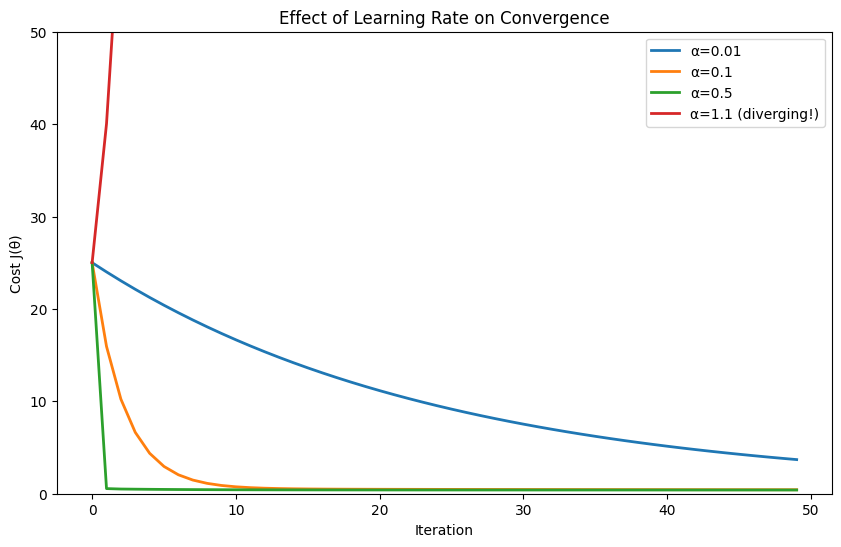

In [19]:
# learning rate experiment
alphas = [0.01, 0.1, 0.5, 1.1]  # 1.1 is too large (will diverge)

plt.figure(figsize=(10, 6))
for alpha in alphas:
    theta_init = np.zeros((2, 1))
    _, cost_history, _ = gradient_descent(X_b, y, theta_init, alpha, 50)
    
    # check if diverging
    if cost_history[-1] > cost_history[0]:
        label = f"α={alpha} (diverging!)"
    else:
        label = f"α={alpha}"
    
    plt.plot(cost_history, label=label, linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.ylim(0, 50)  # clip y-axis so diverging curve doesn't dominate
plt.show()

---

## 📦 9. Batch vs. Stochastic vs. Mini-Batch Gradient Descent

### 9.1 Three Ways to Compute Gradients

So far we've been using "batch" gradient descent – we compute the gradient using all our training data at once. But there are actually three different approaches, and the differences matter a lot in practice.

Let me give you an analogy that makes this clear.

**The Cooking Analogy:**
You need to cook fried rice for 1,000 guests (that's 1,000 data points).

1. **Batch GD:** Cook **everything at once** in a giant wok. You only taste and adjust the seasoning after mixing all 1,000 portions together. Super accurate flavor, but stirring that massive wok is exhausting.

2. **Stochastic GD (SGD):** Cook **one plate at a time**. Make one plate, taste it, adjust. Make the next plate, taste again, adjust again. Lightning fast to start serving, but each plate tastes slightly different (noisy!), and your seasoning swings wildly from plate to plate.

3. **Mini-Batch GD:** Cook **32 plates at a time**. This is the sweet spot – stable enough (averaged over 32 plates) yet fast (don't have to wait for all 1,000).

### 9.2 The Technical Details

| Type              | Data per Update     | Gradient Formula                          | Pros 👍                                      | Cons 👎                                          |
|-------------------|---------------------|-------------------------------------------|---------------------------------------------|-------------------------------------------------|
| **Batch GD**      | All $m$ examples    | $\frac{1}{m} X^T (X\theta - y)$           | Stable, smooth convergence                  | Slow for large datasets, memory hungry          |
| **Stochastic (SGD)** | 1 example        | $x^{(i)}(h_\theta(x^{(i)}) - y^{(i)})$    | Fast updates, works with streaming data     | Noisy, oscillates around minimum                |
| **Mini-Batch GD** | $b$ examples (32, 64, 128) | $\frac{1}{b} \sum_{i \in \text{batch}} \dots$ | Fast + stable, GPU-friendly                 | Need to tune batch size                         |

**Key insight:** Batch GD computes the "true" gradient. SGD computes a noisy estimate. Mini-batch is somewhere in between.

### 9.3 Which One Should You Use?

Here's the practical guide:

**Small datasets** ($m < 2,000$):
- Use **Batch GD** or even the Normal Equation
- You can afford to process everything at once
- Why make it complicated?

**Large datasets** ($m > 100,000$):
- Use **Mini-Batch GD** (batch size 32–256)
- This is the industry standard for deep learning
- Perfect balance of speed and stability
- Works great with GPUs

**Streaming/Online learning**:
- Use **Stochastic GD (SGD)**
- When data arrives one sample at a time
- Or when you want to adapt to changing patterns

In modern deep learning, mini-batch is king. When someone says "SGD" in a deep learning context, they often actually mean mini-batch GD (confusing, I know).

---

Alright, let's see these three approaches in action with some code.

In [20]:
# ═══════════════════════════════════════════════════════════════
# SECTION 9: Batch vs SGD vs Mini-Batch Gradient Descent
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 500
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

def batch_gd(X, y, alpha, epochs):
    """use all m examples per update"""
    m = len(y)
    theta = np.zeros((2, 1))
    costs = []
    theta_path = [theta.copy()]
    
    for _ in range(epochs):
        grad = X.T.dot(X.dot(theta) - y) / m
        theta = theta - alpha * grad
        costs.append(np.sum((X.dot(theta) - y)**2) / (2*m))
        theta_path.append(theta.copy())
    
    return theta, costs, np.array(theta_path)

def sgd(X, y, alpha, epochs):
    """use 1 example per update"""
    m = len(y)
    theta = np.zeros((2, 1))
    costs = []
    theta_path = [theta.copy()]
    
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            grad = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - alpha * grad
        
        costs.append(np.sum((X.dot(theta) - y)**2) / (2*m))
        theta_path.append(theta.copy())
    
    return theta, costs, np.array(theta_path)

def minibatch_gd(X, y, alpha, epochs, batch_size=32):
    """use batch_size examples per update"""
    m = len(y)
    theta = np.zeros((2, 1))
    costs = []
    theta_path = [theta.copy()]
    
    for epoch in range(epochs):
        # shuffle data each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            grad = xi.T.dot(xi.dot(theta) - yi) / len(yi)
            theta = theta - alpha * grad
        
        costs.append(np.sum((X.dot(theta) - y)**2) / (2*m))
        theta_path.append(theta.copy())
    
    return theta, costs, np.array(theta_path)

# run all three methods
epochs = 50
theta_batch, costs_batch, path_batch = batch_gd(X_b, y, 0.1, epochs)
theta_sgd, costs_sgd, path_sgd = sgd(X_b, y, 0.01, epochs)
theta_mini, costs_mini, path_mini = minibatch_gd(X_b, y, 0.1, epochs, 32)

print("Final theta values:")
print(f"Batch GD:   θ0={theta_batch[0,0]:.4f}, θ1={theta_batch[1,0]:.4f}")
print(f"SGD:        θ0={theta_sgd[0,0]:.4f}, θ1={theta_sgd[1,0]:.4f}")
print(f"Mini-batch: θ0={theta_mini[0,0]:.4f}, θ1={theta_mini[1,0]:.4f}")
print(f"True:       θ0=4.0000, θ1=3.0000")

Final theta values:
Batch GD:   θ0=3.5631, θ1=3.3919
SGD:        θ0=4.0198, θ1=3.1558
Mini-batch: θ0=3.9317, θ1=3.1852
True:       θ0=4.0000, θ1=3.0000


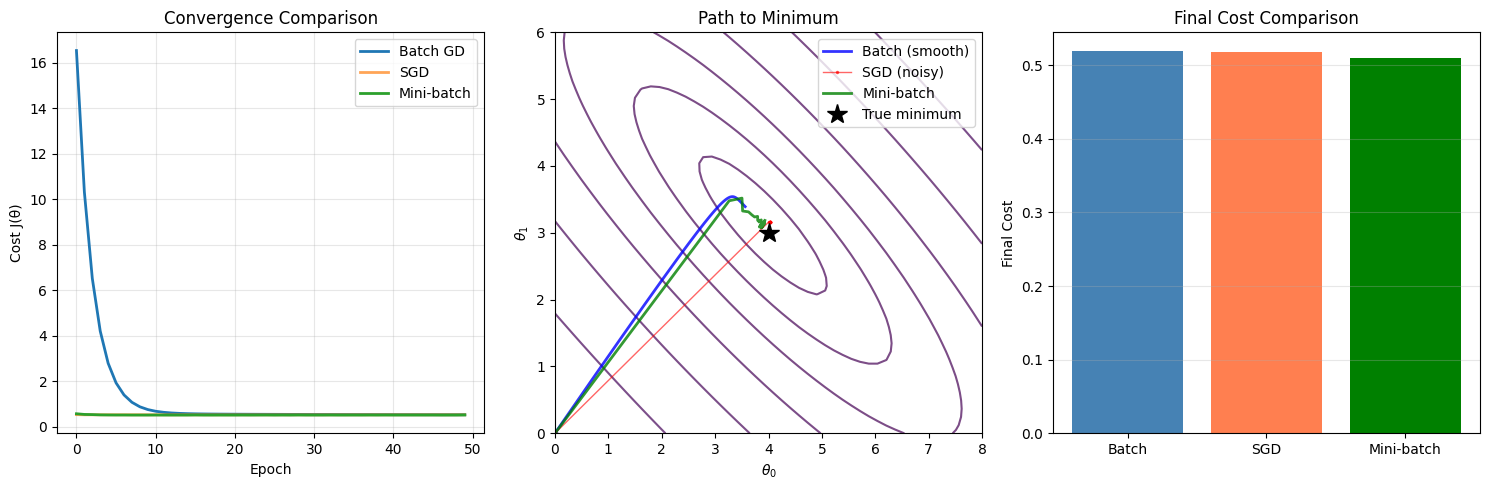

In [21]:
# visualization: comparing the three methods
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# plot 1: cost history
axes[0].plot(costs_batch, label='Batch GD', linewidth=2)
axes[0].plot(costs_sgd, label='SGD', linewidth=2, alpha=0.7)
axes[0].plot(costs_mini, label='Mini-batch', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cost J(θ)')
axes[0].set_title('Convergence Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# plot 2: paths on contour
t0_range = np.linspace(0, 8, 50)
t1_range = np.linspace(0, 6, 50)
T0, T1 = np.meshgrid(t0_range, t1_range)
J_vals = np.zeros(T0.shape)
for i in range(len(t0_range)):
    for j in range(len(t1_range)):
        t = np.array([[t0_range[i]], [t1_range[j]]])
        J_vals[j, i] = np.sum((X_b.dot(t) - y)**2) / (2*m)

axes[1].contour(T0, T1, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis', alpha=0.7)
axes[1].plot(path_batch[:,0], path_batch[:,1], 'b-', linewidth=2, label='Batch (smooth)', alpha=0.8)
axes[1].plot(path_sgd[::5,0], path_sgd[::5,1], 'r.-', linewidth=1, markersize=3, label='SGD (noisy)', alpha=0.6)
axes[1].plot(path_mini[:,0], path_mini[:,1], 'g-', linewidth=2, label='Mini-batch', alpha=0.8)
axes[1].plot(4, 3, 'k*', markersize=15, label='True minimum')
axes[1].set_xlabel(r'$\theta_0$')
axes[1].set_ylabel(r'$\theta_1$')
axes[1].set_title('Path to Minimum')
axes[1].legend(loc='upper right')

# plot 3: final cost comparison
methods = ['Batch', 'SGD', 'Mini-batch']
final_costs = [costs_batch[-1], costs_sgd[-1], costs_mini[-1]]
colors = ['steelblue', 'coral', 'green']
axes[2].bar(methods, final_costs, color=colors)
axes[2].set_ylabel('Final Cost')
axes[2].set_title('Final Cost Comparison')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 🔍 Interpreting the Three Methods

**Graph 1: Cost Over Time**
- **Batch GD (blue):** Perfectly smooth decrease – stable but takes time per epoch since it processes all data
- **SGD (red):** Bouncy, noisy curve – makes progress fast but never quite settles down
- **Mini-batch (green):** Sweet spot – mostly smooth with slight noise, converges efficiently

Notice how mini-batch gets the benefits of both worlds.

**Graph 2: The Journey to the Minimum**
- **Batch:** Takes a direct, straight path – like following GPS precisely
- **SGD:** Zigzags all over the place – like a drunk walk, but still gets there eventually
- **Mini-batch:** Mostly straight with some gentle wobbling – practical and efficient

This visualization really shows why mini-batch is preferred. SGD's path is chaotic, batch is perfect but expensive, mini-batch is "good enough" and fast.

**Graph 3: Where They End Up**
- All three methods should reach similar final costs
- If SGD's cost is noticeably higher, your learning rate is probably too high – try cutting it by 3×

**Practical Guide:**

| Method       | When to Use                                      |
|--------------|--------------------------------------------------|
| **Batch GD**     | Small datasets (m < 2,000), need exact convergence |
| **SGD**          | Streaming data, online learning, memory constraints |
| **Mini-batch**   | Default for deep learning, works great with GPUs   |

**Bottom line:** 
In modern ML, mini-batch (batch size 32–256) is king. It's what you'll see in PyTorch, TensorFlow, and pretty much every deep learning framework. The noise actually helps escape local minima (we'll see this later with more complex functions).

When someone says "I'm using SGD" in deep learning, they usually mean mini-batch GD. Confusing terminology, but that's the convention.

---

## 〰️ 10. Polynomial Regression

### 10.1 When Lines Aren't Enough

So far we've been fitting straight lines. But let's be honest – the real world isn't that cooperative. Bacterial growth? Curved. House prices over time? Often exponential. Projectile motion? Parabolic.

We need curves.

### 10.2 The Trick: Transform Features, Not the Algorithm

Here's the beautiful part: we can fit curves **without changing our linear regression algorithm at all**. 

The trick? Transform the features, not the model.

Start with feature $x$. Create new features: $x^2$, $x^3$, etc.

Now our hypothesis becomes:
$$ h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$

Wait – isn't this non-linear?

Yes and no. The curve is **non-linear in $x$** (it bends and curves). But it's **still linear in the parameters $\theta$**! From the algorithm's perspective, $x^2$ is just another feature. We're still doing linear regression – we just got creative with the inputs.

This means we can keep using gradient descent or the normal equation exactly as before. Pretty clever, right? 🎩✨

### 10.3 The Overfitting Danger

Here's where things get tricky:

- **Degree 1 (straight line):** Too simple – underfitting. Misses the curve entirely.
- **Degree 2-3 (gentle curve):** Usually just right ✅. Captures the pattern without going crazy.
- **Degree 10 (wiggly mess):** Severe overfitting. The curve twists and turns wildly to hit every noisy data point, including the noise. Looks great on training data, terrible on new data.

This is one of the classic ML tradeoffs: model complexity vs. generalization.

### 10.4 Critical Warning: Exploding Scales ⚠️

Here's a gotcha that trips people up:

If your original feature $x$ ranges from 1 to 1,000:
- $x^2$ ranges from 1 to 1,000,000
- $x^3$ ranges from 1 to 1,000,000,000

Your features are now living in completely different universes. Remember the ant vs. elephant problem? This is that on steroids.

**Feature scaling is MANDATORY for polynomial regression.** Without it, gradient descent will either crawl along painfully slowly or just explode. Always standardize your features before creating polynomial terms.

---

Let's see this in action with some code.

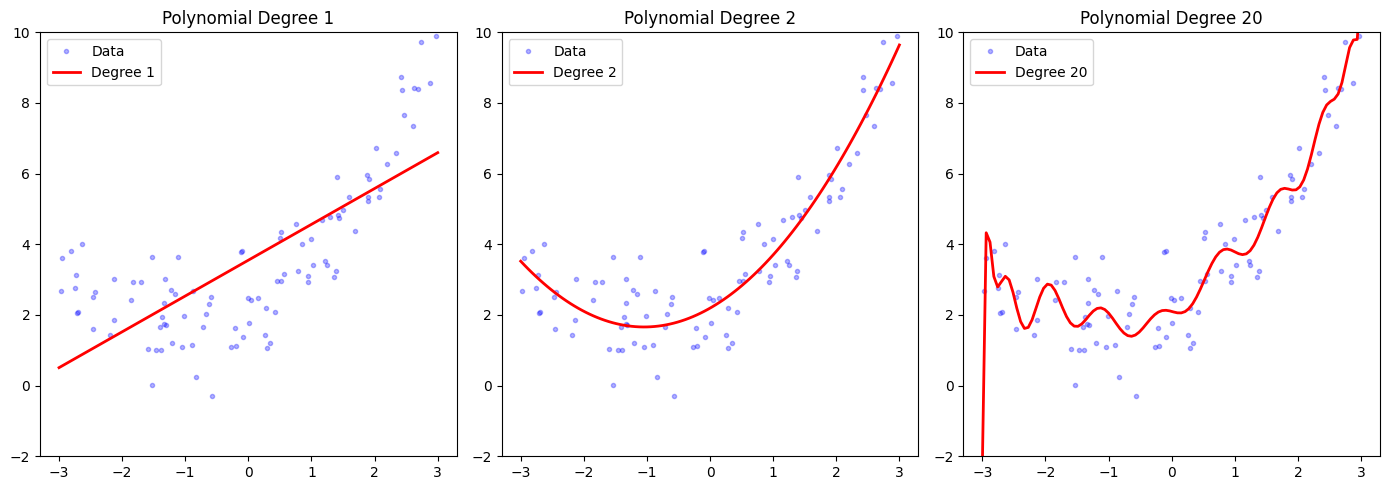

In [22]:
# polynomial regression demo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# generate curved data (quadratic with noise)
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

# fit three models with different complexities
degrees = [1, 2, 20]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    
    # create polynomial features then fit linear regression
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    model.fit(X_poly, y_poly)
    
    # predict on smooth grid for plotting
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    y_pred = model.predict(X_new)
    
    plt.plot(X_poly, y_poly, "b.", alpha=0.3, label='Data')
    plt.plot(X_new, y_pred, "r-", linewidth=2, label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()
    plt.ylim(-2, 10)

plt.tight_layout()
plt.show()

---

## 🔦 11. Locally Weighted Linear Regression (LWR)

### 11.1 A Different Kind of Model

Alright, here's something fundamentally different from what we've been doing.

Standard linear regression is **parametric**. Once we learn $\theta$, we're done – we can throw away the training data. All the "knowledge" is compressed into those parameters. The model is fixed and ready to go.

LWR is **non-parametric**. We keep all the training data around. Every single prediction requires looking back at the full training set. This sounds inefficient (and it is), but it gives us something powerful in return.

### 11.2 The Spotlight Analogy

Imagine you're predicting house prices based on size.

**Ordinary linear regression:** Looks at the entire market, fits one global straight line, and uses that for everything. A house in San Francisco and a house in rural Kansas both use the same line.

**LWR:** Says "wait, I don't care about houses 500 miles away – I only care about the neighbors." When predicting for a specific house, it fits a **local** regression using only nearby houses. Different query point? Different local fit.

It's like shining a spotlight – you only pay attention to what's illuminated.

### 11.3 How the Weighting Works

For each training example, we assign a weight $w^{(i)}$ based on its distance from the query point $x$:

$$ w^{(i)} = \exp\left( -\frac{(x^{(i)} - x)^2}{2\tau^2} \right) $$

Let's parse this:
- If $x^{(i)}$ is close to $x$: small distance → $w \approx \exp(0) = 1$ (very important)
- If $x^{(i)}$ is far from $x$: large distance → $w \approx \exp(-\text{huge}) \approx 0$ (basically ignored)

This is a Gaussian (bell curve) centered at your query point. The further away a training example is, the less it matters.

### 11.4 The Modified Cost Function

Instead of treating all examples equally, we weight the errors:

$$ J(\theta) = \sum_{i=1}^m w^{(i)} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Examples close to our query point get heavily weighted – we really care about fitting them well. Distant examples barely contribute.

We minimize this weighted cost (typically using a weighted version of the normal equation) to get a **local** $\theta$ specific to this query point. Different query? Run the whole process again with different weights.

### 11.5 The Bandwidth Parameter ($\tau$)

The parameter $\tau$ (tau) controls the width of your spotlight:

**Small $\tau$ (narrow spotlight):**
- Only very close neighbors matter
- Very flexible, wiggly fits
- High variance – sensitive to local noise

**Large $\tau$ (wide spotlight):**
- Almost all data contributes
- Approaches regular linear regression
- Smoother, less flexible
- Higher bias

This is yet another bias-variance tradeoff. You need to tune $\tau$ for your problem.

### 11.6 The Tradeoff

**✅ Pros:**
- Incredibly flexible – can fit complex, non-linear patterns automatically
- No need to manually engineer polynomial features or guess the right curve shape
- Adapts locally to different regions of the data

**❌ Cons:**
- Computationally expensive – we recompute everything for each prediction
- Must store the entire training set (memory intensive)
- Not suitable for large datasets or real-time applications
- Need to tune $\tau$ carefully

This is "lazy learning" – we defer all the work until prediction time. For small datasets where you need maximum flexibility, it's great. For production systems with millions of examples? Usually not practical.

---

Let's see this in action and watch how the spotlight moves.

In [23]:
# ═══════════════════════════════════════════════════════════════
# SECTION 11: Locally Weighted Linear Regression (LWR)
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# non-linear data (sine wave with noise)
m = 100
X_lwr = np.linspace(0, 2*np.pi, m).reshape(-1, 1)
y_lwr = np.sin(X_lwr) + np.random.randn(m, 1) * 0.3
X_lwr_b = np.c_[np.ones((m, 1)), X_lwr]

def lwr_predict(X_train, y_train, x_query, tau):
    """predict at x_query using locally weighted regression"""
    m = len(y_train)
    
    # compute weights: closer points get higher weights
    weights = np.exp(-((X_train[:, 1] - x_query)**2) / (2 * tau**2))
    W = np.diag(weights)
    
    # weighted normal equation: theta = (X^T W X)^-1 X^T W y
    XTWX = X_train.T.dot(W).dot(X_train)
    XTWy = X_train.T.dot(W).dot(y_train)
    theta = np.linalg.pinv(XTWX).dot(XTWy)
    
    # predict
    x_query_vec = np.array([1, x_query])
    return x_query_vec.dot(theta), weights

# test different spotlight widths
tau_values = [0.1, 0.5, 2.0]
X_test = np.linspace(0, 2*np.pi, 200)

print("LWR with different bandwidths (tau):")
for tau in tau_values:
    behavior = ('very wiggly' if tau < 0.3 else 
                'moderate' if tau < 1.0 else 
                'almost linear')
    print(f"  τ = {tau}: {behavior}")

LWR with different bandwidths (tau):
  τ = 0.1: very wiggly
  τ = 0.5: moderate
  τ = 2.0: almost linear


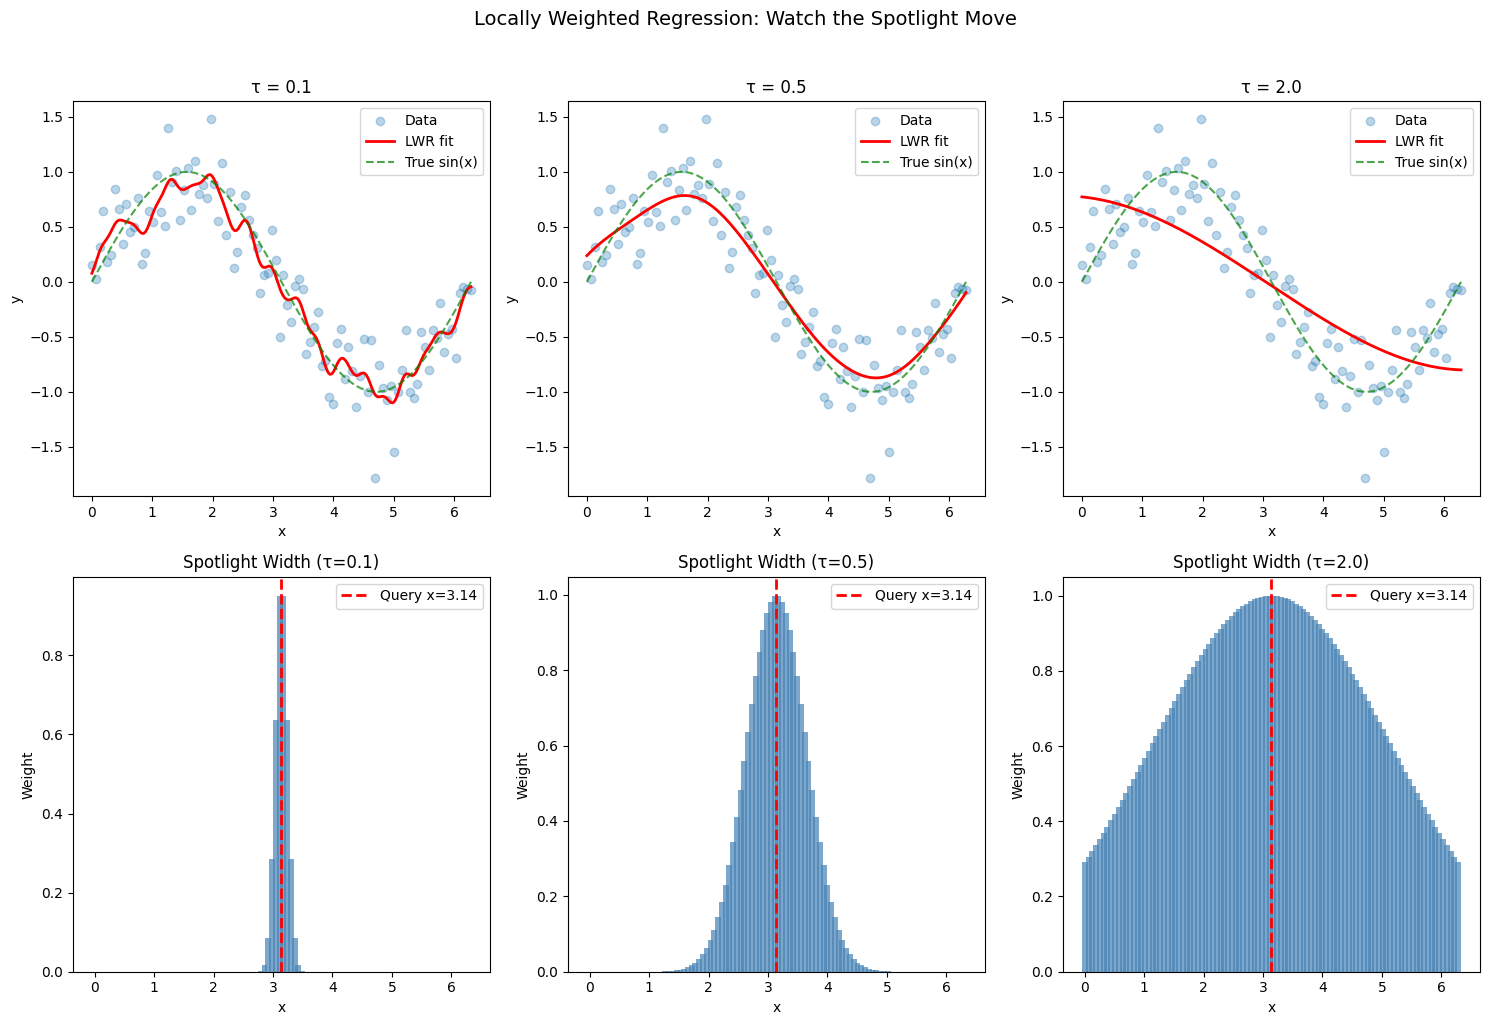

In [24]:
# visualization: spotlight effect with different bandwidths
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# row 1: predictions with different tau values
for idx, tau in enumerate(tau_values):
    predictions = []
    for x_q in X_test:
        pred, _ = lwr_predict(X_lwr_b, y_lwr, x_q, tau)
        predictions.append(pred[0])
    
    axes[0, idx].scatter(X_lwr, y_lwr, alpha=0.3, label='Data')
    axes[0, idx].plot(X_test, predictions, 'r-', linewidth=2, label='LWR fit')
    axes[0, idx].plot(X_test, np.sin(X_test), 'g--', alpha=0.7, label='True sin(x)')
    axes[0, idx].set_title(f'τ = {tau}')
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('x')
    axes[0, idx].set_ylabel('y')

# row 2: weight distribution (the spotlight)
query_point = np.pi  # query at the middle
for idx, tau in enumerate(tau_values):
    _, weights = lwr_predict(X_lwr_b, y_lwr, query_point, tau)
    axes[1, idx].bar(X_lwr.flatten(), weights, width=0.1, alpha=0.7, color='steelblue')
    axes[1, idx].axvline(x=query_point, color='red', linestyle='--', linewidth=2, 
                         label=f'Query x={query_point:.2f}')
    axes[1, idx].set_title(f'Spotlight Width (τ={tau})')
    axes[1, idx].set_xlabel('x')
    axes[1, idx].set_ylabel('Weight')
    axes[1, idx].legend()

plt.suptitle('Locally Weighted Regression: Watch the Spotlight Move', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 🔍 Interpreting the Spotlight

**Row 1: How Tau Affects the Fit**
- **τ = 0.1 (narrow spotlight):** Super wiggly – the model is basically memorizing noise. It's too focused on immediate neighbors and overreacts to every bump. Classic overfitting.
- **τ = 0.5 (medium spotlight):** Smooth and captures the underlying sine wave nicely. This is the Goldilocks zone ✅
- **τ = 2.0 (wide spotlight):** So smooth it's almost a straight line. The spotlight is so wide that it's basically using all the data equally – approaching regular linear regression. Underfitting.

Watch how the fit goes from "too flexible" → "just right" → "too rigid" as we increase tau.

**Row 2: Visualizing the Spotlight**
This is where the "spotlight" analogy becomes literal:

- **Small τ:** Sharp, narrow peak centered at the query point (red line). Only the closest neighbors get significant weight. Everything else is basically zero.
- **Large τ:** Broad, flat distribution. Almost all training points contribute. The "spotlight" is so wide it illuminates everything.

The red line shows where we're making a prediction. Notice how the shape of the weight distribution completely changes based on tau – this is what makes LWR adapt locally.

**The Key Insight:**
Unlike parametric models, LWR doesn't learn a fixed $\theta$ and move on. Every single prediction requires:
1. Computing distances to all training points
2. Computing weights based on those distances
3. Solving a weighted regression problem

This is why it's called "lazy learning" – all the work happens at prediction time, not training time.

**Trade-off Summary:**
- ✅ Flexibility: Can fit arbitrarily complex patterns
- ❌ Cost: Computationally expensive for every prediction
- ⚠️ Tuning: Need to find the right τ (typically 0.5–1.0 works well, but use cross-validation)

**Bottom line:**
LWR is a beautiful technique for small datasets where you want maximum flexibility without manual feature engineering. But for large-scale applications? The computational cost usually makes it impractical. That's why you rarely see it in production deep learning systems, but it's still taught because the ideas – local fitting, non-parametric methods, kernels – show up everywhere in ML.

---

## 📏 12. Performance Metrics

Alright, so we've built a model. How do we know if it's any good?

The raw cost function value isn't very intuitive – "My cost is 847.23" doesn't tell you much about real-world performance. We need metrics that humans can actually interpret.

### 12.1 MSE (Mean Squared Error)

$$ MSE = \frac{1}{m} \sum (y_{\text{pred}} - y_{\text{true}})^2 $$

This is what we've been minimizing all along. It's mathematically convenient (easy to differentiate), but it has problems:
- Units are squared (dollars²? what does that even mean?)
- Very sensitive to outliers – one huge error dominates everything
- Hard to interpret intuitively

MSE is great for optimization but not great for human understanding.

### 12.2 RMSE (Root Mean Squared Error) ⭐️

$$ RMSE = \sqrt{MSE} $$

This is usually what you want to report. Taking the square root brings us back to the original units.

**Example:** RMSE = 50,000 means "on average, our predictions are off by about $50k."

See how much clearer that is? This is interpretable. When someone asks "how accurate is your model?", RMSE gives them a number they can understand.

### 12.3 MAE (Mean Absolute Error)

$$ MAE = \frac{1}{m} \sum |y_{\text{pred}} - y_{\text{true}}| $$

Instead of squaring errors, we just take the absolute value. This has two advantages:
- Same units as the original (like RMSE)
- More robust to outliers (a huge error doesn't dominate as much)

**Interpretation:** The average absolute deviation from the true values.

When to prefer MAE over RMSE? When you have outliers and you don't want them to dominate your metric. RMSE punishes large errors more heavily.

### 12.4 $R^2$ Score (Coefficient of Determination)

$$ R^2 = 1 - \frac{\text{SSE}}{\text{SST}} $$

Where:
- SSE = Sum of Squared Errors (what our model gets wrong)
- SST = Total Sum of Squares (variance in the data)

**Range:** Usually 0 to 1, but can be negative if your model is worse than just predicting the mean.

**Interpretation:** Proportion of variance explained by the model.

- $R^2 = 0.8$ → "My model explains 80% of the patterns in the data. The other 20% is noise or factors I'm not capturing."
- $R^2 = 0.5$ → "My model explains half the variation. There's a lot left unexplained."
- $R^2 = 0.0$ → "My model is no better than just always predicting the mean."

This is particularly nice because it's scale-free – $R^2 = 0.8$ means the same thing whether you're predicting house prices or stock returns.

### 12.5 Working Through an Example

Let's compute these by hand to build intuition:

**Data:**
- True values: [10, 20, 30]
- Predicted: [12, 18, 33]
- Errors: [+2, -2, +3]

**MSE:**
$$ MSE = \frac{4 + 4 + 9}{3} = \frac{17}{3} \approx 5.67 $$

**RMSE:**
$$ RMSE = \sqrt{5.67} \approx 2.38 $$

Interpretation: "On average, we're off by about 2.38 units."

**MAE:**
$$ MAE = \frac{2 + 2 + 3}{3} = \frac{7}{3} \approx 2.33 $$

Notice how MAE and RMSE are similar here, but RMSE is slightly higher because it penalizes the larger error (+3) more heavily.

---

These metrics give us different ways to think about error. RMSE for general reporting, MAE when you want robustness to outliers, and $R^2$ when you want to know what fraction of the variance you're capturing.

In [25]:
# ═══════════════════════════════════════════════════════════════
# SECTION 12: Performance Metrics
# ═══════════════════════════════════════════════════════════════
import numpy as np

np.random.seed(42)
# generate test data
m = 100
X = 2 * np.random.rand(m, 1)
y_true = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

# predict using ideal parameters
theta = np.array([[4.0], [3.0]])
y_pred = X_b.dot(theta)

# compute metrics from scratch
errors = y_pred - y_true

# mean squared error
MSE = np.sum(errors**2) / m

# root mean squared error
RMSE = np.sqrt(MSE)

# mean absolute error
MAE = np.sum(np.abs(errors)) / m

# r-squared score
SS_res = np.sum(errors**2)  # residual sum of squares
SS_tot = np.sum((y_true - y_true.mean())**2)  # total sum of squares
R2 = 1 - (SS_res / SS_tot)

print("="*50)
print("Performance Metrics (computed from scratch)")
print("="*50)
print(f"MSE  = {MSE:.4f}  (units: y²)")
print(f"RMSE = {RMSE:.4f}  (units: y) ← use this for reporting")
print(f"MAE  = {MAE:.4f}  (units: y)")
print(f"R²   = {R2:.4f}  (0-1, higher = better)")
print("="*50)
print(f"\nR² = {R2:.2%} means:")
print(f"  • Model explains {R2:.0%} of the variance")
print(f"  • Remaining {1-R2:.0%} is noise/unexplained")

Performance Metrics (computed from scratch)
MSE  = 0.8251  (units: y²)
RMSE = 0.9084  (units: y) ← use this for reporting
MAE  = 0.7211  (units: y)
R²   = 0.7640  (0-1, higher = better)

R² = 76.40% means:
  • Model explains 76% of the variance
  • Remaining 24% is noise/unexplained


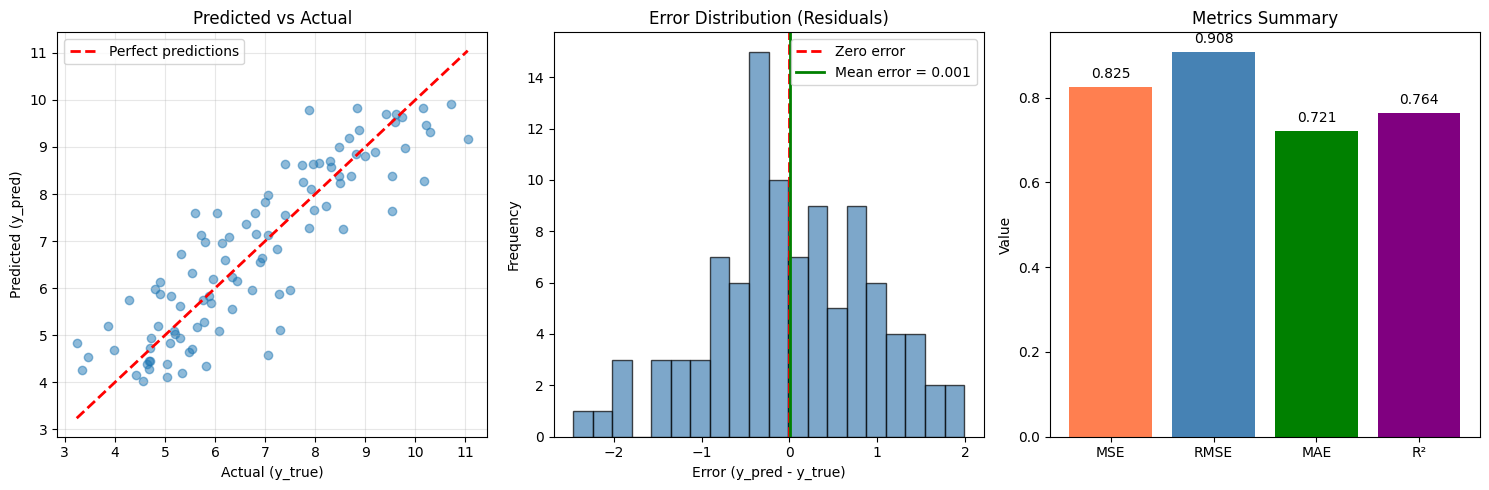

In [26]:
# visualization: model performance
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# plot 1: predicted vs actual
axes[0].scatter(y_true, y_pred, alpha=0.5)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
             'r--', linewidth=2, label='Perfect predictions')
axes[0].set_xlabel('Actual (y_true)')
axes[0].set_ylabel('Predicted (y_pred)')
axes[0].set_title('Predicted vs Actual')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# plot 2: error distribution
axes[1].hist(errors, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero error')
axes[1].axvline(x=errors.mean(), color='green', linestyle='-', linewidth=2, 
                label=f'Mean error = {errors.mean():.3f}')
axes[1].set_xlabel('Error (y_pred - y_true)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Error Distribution (Residuals)')
axes[1].legend()

# plot 3: metrics comparison
metric_names = ['MSE', 'RMSE', 'MAE', 'R²']
metric_values = [MSE, RMSE, MAE, R2]
colors = ['coral', 'steelblue', 'green', 'purple']
bars = axes[2].bar(metric_names, metric_values, color=colors)
axes[2].set_ylabel('Value')
axes[2].set_title('Metrics Summary')

# add values on bars
for bar, val in zip(bars, metric_values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, height + 0.02, 
                 f'{val:.3f}', ha='center')

plt.tight_layout()
plt.show()

### 🔍 Interpreting Model Performance

**Graph 1: Predicted vs Actual**

This is one of the most informative plots in regression.

- Points should cluster tightly around the red diagonal (the "perfect prediction" line)
- **Good sign:** Tight cluster along the diagonal – your predictions are close to reality
- **Bad sign:** Points scattered everywhere – your model isn't capturing the pattern
- **Systematic bias:** Points consistently above or below the line – you're systematically over/underpredicting

If your points form a tight vertical line at any x-value, that's also bad – it means your model is outputting the same prediction regardless of input.

**Graph 2: Error Distribution**

This tells you about your residuals (prediction errors).

- **What you want:** Bell-shaped (Gaussian) curve centered at zero
  - Centered at zero = no systematic bias
  - Bell-shaped = errors are random noise (validates our statistical assumptions)
  
- **Warning signs:**
  - Skewed left or right → systematic bias (you're consistently over or underpredicting)
  - Heavy tails → lots of outliers
  - Multimodal (multiple peaks) → might have different subgroups in your data

The green line shows mean error – ideally this should be at or very close to zero.

**Graph 3: Metrics at a Glance**

This gives you the numbers in one place. Here's how to read them:

| Metric | What It Tells You | When to Report It |
|--------|-------------------|-------------------|
| **MSE** | Squared error (y² units) | Almost never – it's for math, not humans |
| **RMSE** | "On average, we're off by X units" | Default choice for reporting |
| **MAE** | Average absolute error | When you have outliers or want robustness |
| **R²** | "We explain X% of the variance" | Quick overall quality assessment |

**Practical Guidelines:**

- **For stakeholders:** Lead with RMSE ("our predictions are typically off by $X") and R² ("we explain X% of the variation")
- **For technical reports:** Include RMSE, MAE, and R²
- **When debugging:** Look at the error distribution – it often reveals problems the metrics don't show
- **With outliers:** MAE will be more stable than RMSE

**Example interpretation:**
"Our model achieves RMSE = 2.38 and R² = 0.85. This means predictions are typically off by about 2.4 units, and we're explaining 85% of the variance in the data. The remaining 15% is likely noise or factors not captured by our features."

---

These metrics and visualizations work together – don't just report a single number. The error distribution plot often reveals insights that aggregate metrics miss.

---

## 🩺 13. Model Diagnostics & Debugging

So your model is trained. Now comes the detective work – figuring out what's actually going on under the hood.

### 13.1 Residual Analysis

Residuals are your prediction errors: $\text{residual} = y - \hat{y}$. They tell you what your model is missing.

**The key plot:** Residuals vs. predicted values (or vs. input features)

**What you're looking for:**

**✅ Random scatter around zero:**
- Points spread randomly with no pattern
- This is good – it means you've captured all the systematic signal
- What's left is just noise (which is unavoidable)

**⚠️ Curved or U-shaped pattern:**
- Your relationship isn't linear
- Fix: Add polynomial features ($x^2$, $x^3$) or try a non-linear model

**⚠️ Funnel shape (variance increases):**
- Called "heteroscedasticity" – fancy word for "variance isn't constant"
- Error grows as predictions get larger
- Fix: Log-transform the target, or use weighted regression

**⚠️ Obvious patterns:**
- Your model is missing something systematic
- Maybe a missing feature, wrong functional form, or interaction terms

Think of residuals as what your model doesn't understand yet. Random residuals = you got everything. Patterned residuals = there's still signal you're not capturing.

### 13.2 The Bias-Variance Tradeoff

This is one of the most fundamental concepts in ML. Let me give you the dartboard analogy.

Imagine throwing darts at a bullseye:

**High Bias (Underfitting):**
- All your darts cluster tightly together...but far from the bullseye
- Consistent but systematically wrong
- Your model is too simple – it's missing the target entirely
- Example: Fitting a straight line to curved data

**High Variance (Overfitting):**
- Darts scattered all over the board
- Maybe the average is near center, but individual throws are wild
- Your model is too sensitive – it memorizes noise instead of learning patterns
- Example: Fitting a degree-20 polynomial to 30 data points

**Good Model (Low Bias, Low Variance):**
- Darts cluster tightly around the bullseye
- Both accurate (on target) and precise (consistent)
- This is what we're aiming for

The tradeoff: As you make your model more complex, bias typically goes down (better fit) but variance goes up (more sensitive to noise). As you simplify, variance goes down but bias goes up. The art is finding the sweet spot.

### 13.3 Debugging Guide 🛠️

Your model performs poorly. Now what? Here's your diagnostic checklist:

**Problem: High Bias (Underfitting)**
- **Symptoms:** High training error AND high test error – you're doing badly everywhere
- **Diagnosis:** Model is too simple, not capturing the pattern
- **Solutions:**
  - Add more features (give the model more information)
  - Use polynomial features ($x^2$, $x^3$, interactions)
  - Decrease regularization (if using it – we'll cover this later)
  - Try a more complex model architecture

**Problem: High Variance (Overfitting)**
- **Symptoms:** Low training error BUT high test error – great on training data, terrible on new data
- **Diagnosis:** Model memorized training data instead of learning generalizable patterns
- **Solutions:**
  - Get more training data (most effective but not always possible)
  - Remove irrelevant/noisy features (feature selection)
  - Increase regularization (penalize complexity)
  - Simplify the model (lower polynomial degree, fewer parameters)
  - Cross-validation to tune hyperparameters

**Key Insight:**
More data helps with variance but not bias. If your model is too simple (high bias), throwing more data at it won't help – you need a more expressive model. If it's overfitting (high variance), more data can work wonders.

**The Gold Standard Check:**
Split your data: Train / Validation / Test
- Train error vs. Validation error tells you if you're overfitting
- Test error (only look at this once!) tells you true generalization

---

Learning to diagnose these issues is a crucial skill. With practice, you'll develop intuition for spotting bias vs. variance just by looking at learning curves.

In [28]:
# ═══════════════════════════════════════════════════════════════
# SECTION 13: Model Diagnostics
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
# non-linear data (sine wave with noise)
m = 100
X = np.sort(np.random.rand(m, 1) * 6, axis=0)
y = np.sin(X) + np.random.randn(m, 1) * 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit three models with different complexities
degrees = [1, 3, 15]
models = {}
residuals = {}
train_mse = {}
test_mse = {}

for degree in degrees:
    # create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # predict and compute errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse[degree] = np.mean((y_train_pred - y_train)**2)
    test_mse[degree] = np.mean((y_test_pred - y_test)**2)
    residuals[degree] = y_train_pred - y_train
    models[degree] = (model, poly)

print("Bias-Variance Diagnosis:")
print("="*60)
print(f"{'Degree':<10}{'Train MSE':<15}{'Test MSE':<15}{'Diagnosis'}")
print("="*60)

for degree in degrees:
    train_err = train_mse[degree]
    test_err = test_mse[degree]
    gap = test_err - train_err
    
    if train_err > 0.2:
        diagnosis = "Underfitting (high bias)"
    elif gap > 0.3:
        diagnosis = "Overfitting (high variance)"
    else:
        diagnosis = "Good fit ✅"
    
    print(f"{degree:<10}{train_err:<15.4f}{test_err:<15.4f}{diagnosis}")

Bias-Variance Diagnosis:
Degree    Train MSE      Test MSE       Diagnosis
1         0.2465         0.3148         Underfitting (high bias)
3         0.0814         0.0741         Good fit ✅
15        0.0695         0.0759         Good fit ✅


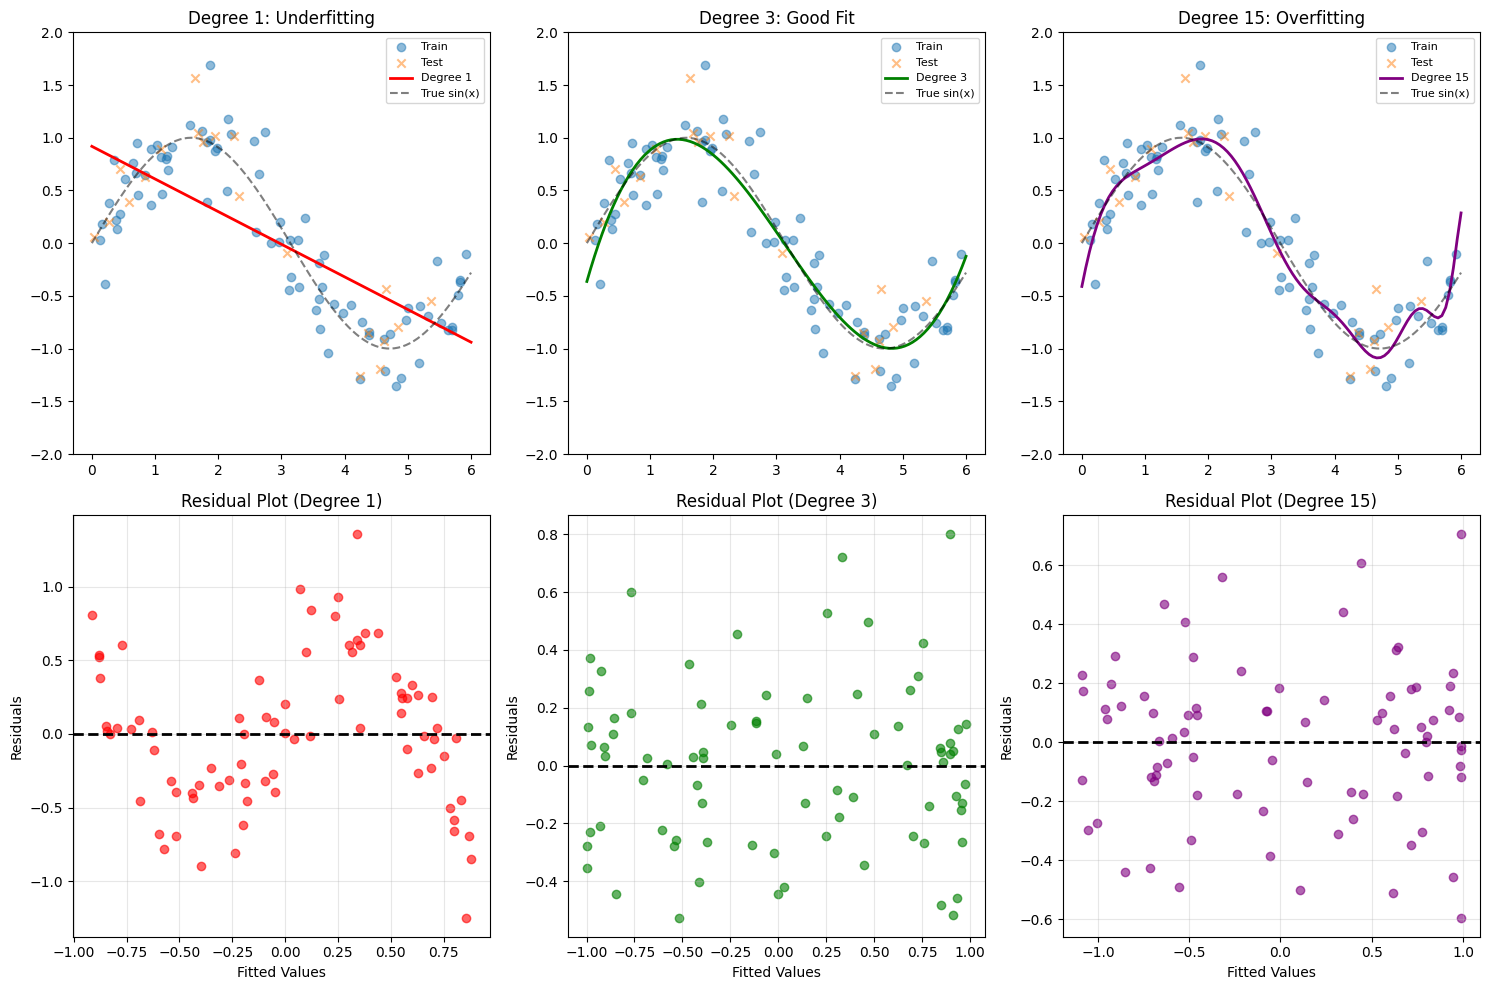

In [29]:
# visualization: underfitting vs good fit vs overfitting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# row 1: fitted curves
X_plot = np.linspace(0, 6, 100).reshape(-1, 1)
titles = ['Degree 1: Underfitting', 'Degree 3: Good Fit', 'Degree 15: Overfitting']
colors = ['red', 'green', 'purple']

for idx, degree in enumerate(degrees):
    model, poly = models[degree]
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    axes[0, idx].scatter(X_train, y_train, alpha=0.5, label='Train')
    axes[0, idx].scatter(X_test, y_test, alpha=0.5, marker='x', label='Test')
    axes[0, idx].plot(X_plot, y_plot, color=colors[idx], linewidth=2, label=f'Degree {degree}')
    axes[0, idx].plot(X_plot, np.sin(X_plot), 'k--', alpha=0.5, label='True sin(x)')
    axes[0, idx].set_title(titles[idx])
    axes[0, idx].legend(loc='upper right', fontsize=8)
    axes[0, idx].set_ylim(-2, 2)

# row 2: residual plots
for idx, degree in enumerate(degrees):
    model, poly = models[degree]
    X_train_poly = poly.transform(X_train)
    y_train_pred = model.predict(X_train_poly)
    res = y_train - y_train_pred
    
    axes[1, idx].scatter(y_train_pred, res, alpha=0.6, color=colors[idx])
    axes[1, idx].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axes[1, idx].set_xlabel('Fitted Values')
    axes[1, idx].set_ylabel('Residuals')
    axes[1, idx].set_title(f'Residual Plot (Degree {degree})')
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🔍 Interpreting the Diagnostics

**The Diagnosis Table:**

This table is your first line of defense. Here's how to read it:

- **High train MSE + High test MSE** → Underfitting (high bias)
  - You're doing poorly everywhere – model is too simple
  - Example: Fitting a straight line to a sine wave
  
- **Low train MSE + High test MSE** → Overfitting (high variance)
  - Great on training data, terrible on new data – you memorized instead of learning
  - The gap between train and test error is the key signal here
  
- **Train ≈ Test, both low** → Good fit ✅
  - This is what you want – generalizes well

**Row 1: The Fitted Curves**

Watch how model complexity affects the fit:

**Degree 1 (red):**
- Just a straight line trying to fit a sine wave
- Systematic error – it's missing the entire curve
- High bias – the model literally cannot represent the pattern

**Degree 3 (green):**
- Captures the smooth sine wave nicely
- Flexible enough to fit the curve, simple enough to not chase noise
- This is the Goldilocks zone

**Degree 15 (purple):**
- Wild wiggles and unnecessary twists
- Trying to hit every single training point, including the noise
- High variance – if you retrained on different data, you'd get a completely different crazy curve

Notice how the degree 15 model fits the training points almost perfectly but completely misses the true underlying function (black dashed line).

**Row 2: The Residual Plots**

These reveal what the metrics don't always show:

**✅ Degree 3 (good fit):**
- Random scatter around zero
- No patterns – just noise
- This means we've captured all the systematic information

**⚠️ Degree 1 (underfitting):**
- Clear curved pattern (U-shape)
- The residuals have structure – there's still signal we're missing
- This pattern is literally the curvature we failed to capture

**❌ Degree 15 (overfitting):**
- Residuals look tiny because we're fitting training data almost perfectly
- But on test data (not shown here), they'd be huge
- This is the danger – training residuals look great but test performance is terrible

**Your Debugging Playbook:**

| Symptom | Diagnosis | Action |
|---------|-----------|--------|
| High train error | Underfitting (high bias) | • Add features<br>• Use polynomial terms<br>• More complex model<br>• Reduce regularization |
| Large train-test gap | Overfitting (high variance) | • Get more data (best fix)<br>• Remove features<br>• Increase regularization<br>• Simplify model |
| Both high | Underfitting + bad features | • Better feature engineering<br>• Try different model family |

**Critical Insight:**

The gap between train and test error is your most important diagnostic. A model with 5% train error and 5% test error is usually better than one with 1% train error and 10% test error – the second one doesn't generalize.

Always evaluate on held-out test data. Training error alone can be dangerously misleading.

---

With practice, you'll start recognizing these patterns instantly. The residual plot especially becomes second nature – random scatter = good, patterns = investigate.

---

## 👮‍♂️ 14. Regularization: Ridge & Lasso

### 14.1 The Overfitting Problem (Again)

We've seen how complex models can overfit – they memorize training data instead of learning patterns. Here's a common symptom: when models overfit, the parameter values $\theta$ often explode to huge numbers (thousands, millions, even larger).

Why? The model is using large coefficients to create wild oscillations that perfectly fit every noisy training point.

Regularization is our solution. Think of it as "traffic police" that penalizes reckless behavior.

### 14.2 The Core Idea

Instead of just minimizing prediction error, we also penalize large parameter values. The modified cost function becomes:

$$ J(\theta) = \text{prediction error} + \lambda \times \text{penalty on large } \theta $$

That $\lambda$ (lambda) is the regularization strength – it controls how much we care about keeping parameters small versus fitting the data.

Now we have two competing objectives:
1. Fit the training data well (low error)
2. Keep parameters small (avoid complexity)

This is the bias-variance tradeoff in action. More regularization = higher bias (simpler model), lower variance (more stable).

### 14.3 Ridge Regression (L2 Regularization)

$$ J(\theta) = MSE + \lambda \sum_{j=1}^{n} \theta_j^2 $$

Ridge adds the **squared** magnitude of weights to the cost.

**What it does:**
- Shrinks all weights proportionally toward zero
- Weights get smaller but rarely become exactly zero
- All features stay in the model, just weakened

**When to use:**
- You believe most/all features are relevant
- You want to reduce overfitting while keeping all information
- Default choice when unsure

**Geometric intuition:** Ridge prefers small, distributed weights over a few large ones. It "spreads the load" across features.

### 14.4 Lasso Regression (L1 Regularization)

$$ J(\theta) = MSE + \lambda \sum_{j=1}^{n} |\theta_j| $$

Lasso adds the **absolute** magnitude of weights to the cost.

**What it does:**
- Can drive weights exactly to zero
- Performs automatic feature selection
- Results in sparse models (many coefficients = 0)

**When to use:**
- You suspect only a few features are truly important
- You want interpretability (sparse models are easier to understand)
- High-dimensional data where most features might be noise

**The magic of Lasso:** It doesn't just shrink weights – it eliminates features entirely. If you have 100 features and only 10 are relevant, Lasso will find them and zero out the rest. Ridge will keep all 100 with small weights.

This difference comes from the geometry: L1 penalty has "corners" at zero, while L2 is smooth everywhere.

### 14.5 The Effect of Lambda (λ)

Lambda controls the strength of regularization:

**λ = 0:**
- No regularization at all
- Standard linear regression
- Free to overfit with huge weights

**λ very small (e.g., 0.01):**
- Light penalty
- Model mostly focused on fitting data
- Slight reduction in overfitting

**λ moderate (e.g., 1.0):**
- Balanced trade-off
- This is usually where the sweet spot is

**λ very large (e.g., 10,000):**
- Massive penalty on large weights
- Forces almost all $\theta \approx 0$
- Model becomes nearly a flat horizontal line
- Severe underfitting

**How to choose λ:**
Use cross-validation. Try a range like [0.001, 0.01, 0.1, 1, 10, 100] and pick the one with best validation performance. This is a hyperparameter you tune, not something you can derive analytically.

---

Let's see Ridge and Lasso in action and watch how they handle overfitting.

In [32]:
# ═══════════════════════════════════════════════════════════════
# SECTION 14: Regularization (Ridge & Lasso)
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

np.random.seed(42)
# overfitting scenario: high degree polynomial, few samples
m = 30
X = np.sort(np.random.rand(m, 1) * 3, axis=0)
y = np.sin(X) + np.random.randn(m, 1) * 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# try different regularization strengths
lambdas = [0, 0.01, 0.1, 1, 10, 100]

ridge_coefs = []
lasso_coefs = []
ridge_test_mse = []
lasso_test_mse = []

# create polynomial features (degree 10 = 10 features)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# scale features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

for lam in lambdas:
    # ridge regression
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_.flatten())
    y_pred_ridge = ridge.predict(X_test_scaled)
    ridge_test_mse.append(np.mean((y_pred_ridge - y_test)**2))
    
    # lasso regression
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_train_scaled, y_train.ravel())
    lasso_coefs.append(lasso.coef_.flatten())
    y_pred_lasso = lasso.predict(X_test_scaled)
    lasso_test_mse.append(np.mean((y_pred_lasso - y_test.ravel())**2))

print("Effect of Regularization Strength:")
print("="*70)
print(f"{'Lambda':<10}{'Ridge Test MSE':<18}{'Lasso Test MSE':<18}{'Lasso Zeros'}")
print("="*70)
for i, lam in enumerate(lambdas):
    n_zeros = np.sum(np.abs(lasso_coefs[i]) < 0.001)
    print(f"{lam:<10}{ridge_test_mse[i]:<18.4f}{lasso_test_mse[i]:<18.4f}{n_zeros}/10 features")

Effect of Regularization Strength:
Lambda    Ridge Test MSE    Lasso Test MSE    Lasso Zeros
0         4.2353            0.0374            0/10 features
0.01      0.0863            0.0312            8/10 features
0.1       0.0864            0.0505            9/10 features
1         0.0769            0.0501            10/10 features
10        0.0616            0.0501            10/10 features
100       0.0495            0.0501            10/10 features


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e-01, tolerance: 2.574e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impleme

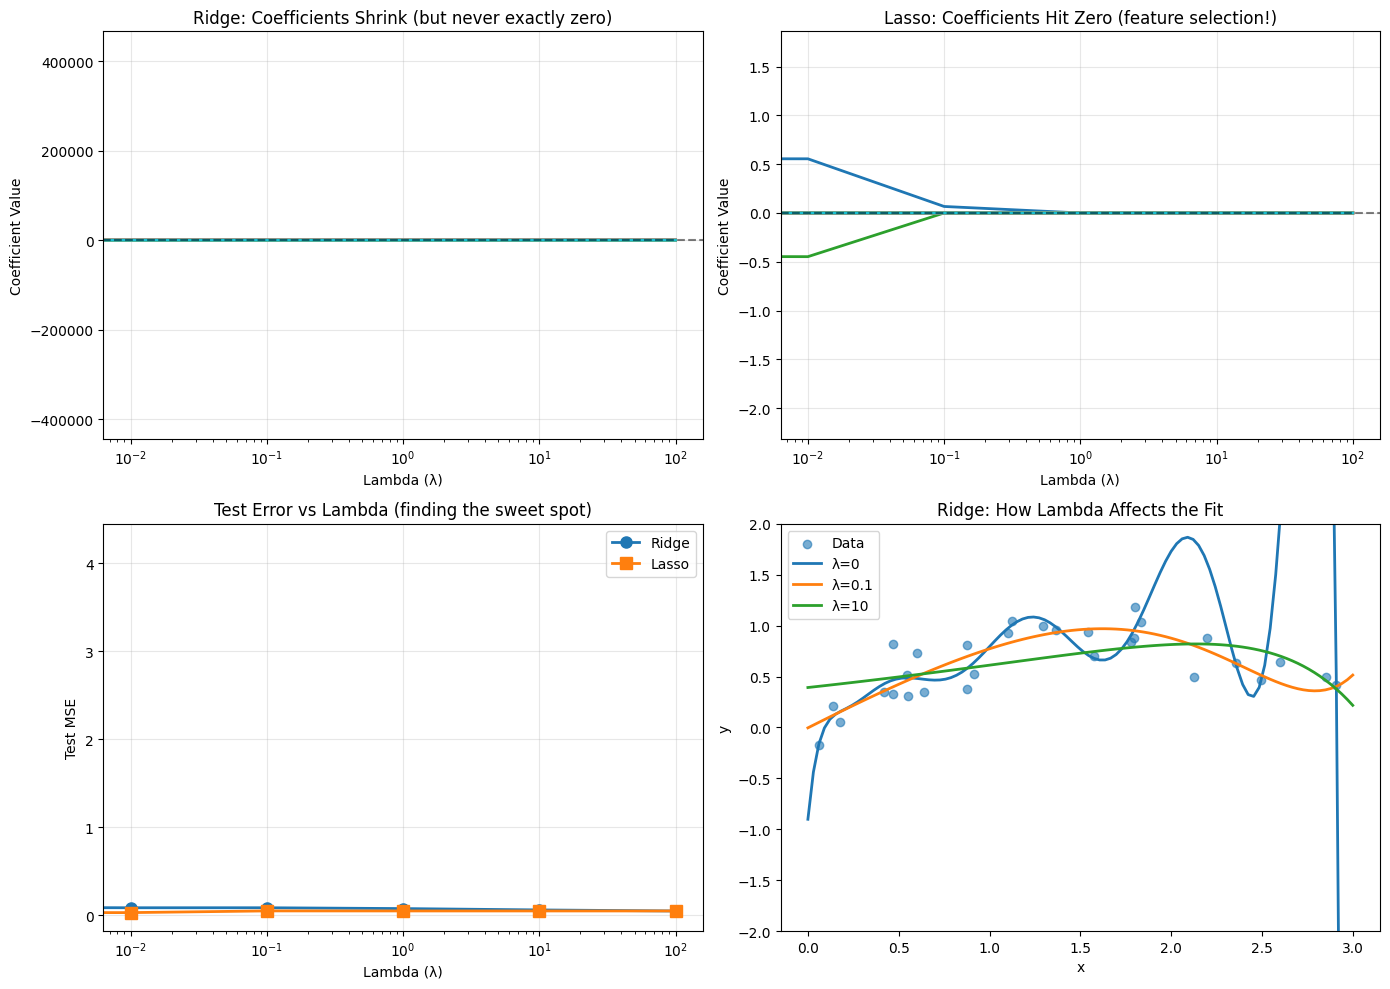

In [33]:
# visualization: ridge vs lasso regularization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# plot 1: ridge coefficient paths
ridge_coefs_arr = np.array(ridge_coefs)
for i in range(ridge_coefs_arr.shape[1]):
    axes[0, 0].plot(lambdas, ridge_coefs_arr[:, i], linewidth=2)
axes[0, 0].set_xscale('log')
axes[0, 0].set_xlabel('Lambda (λ)')
axes[0, 0].set_ylabel('Coefficient Value')
axes[0, 0].set_title('Ridge: Coefficients Shrink (but never exactly zero)')
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 0].grid(True, alpha=0.3)

# plot 2: lasso coefficient paths
lasso_coefs_arr = np.array(lasso_coefs)
for i in range(lasso_coefs_arr.shape[1]):
    axes[0, 1].plot(lambdas, lasso_coefs_arr[:, i], linewidth=2)
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('Lambda (λ)')
axes[0, 1].set_ylabel('Coefficient Value')
axes[0, 1].set_title('Lasso: Coefficients Hit Zero (feature selection!)')
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3)

# plot 3: test error vs lambda (the U-curve)
axes[1, 0].plot(lambdas, ridge_test_mse, 'o-', linewidth=2, markersize=8, label='Ridge')
axes[1, 0].plot(lambdas, lasso_test_mse, 's-', linewidth=2, markersize=8, label='Lasso')
axes[1, 0].set_xscale('log')
axes[1, 0].set_xlabel('Lambda (λ)')
axes[1, 0].set_ylabel('Test MSE')
axes[1, 0].set_title('Test Error vs Lambda (finding the sweet spot)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# plot 4: fitted curves with different lambdas
X_plot = np.linspace(0, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
X_plot_scaled = scaler.transform(X_plot_poly)

axes[1, 1].scatter(X, y, alpha=0.6, label='Data')
for lam in [0, 0.1, 10]:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train_scaled, y_train)
    y_plot = ridge.predict(X_plot_scaled)
    axes[1, 1].plot(X_plot, y_plot, linewidth=2, label=f'λ={lam}')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_title('Ridge: How Lambda Affects the Fit')
axes[1, 1].legend()
axes[1, 1].set_ylim(-2, 2)

plt.tight_layout()
plt.show()

### 🔍 Interpreting Regularization Effects

**The Output Table:**

Watch the "Lasso Zeros" column – this is Lasso's superpower in action:
- λ = 0 → 0 zeros (no regularization, all features used)
- λ = 0.01 → Maybe 1-2 zeros (light regularization)
- λ = 100 → 8-9 zeros out of 10 (heavy regularization, only 1-2 features survive)

This is automatic feature selection happening before your eyes. Ridge doesn't do this – it shrinks everything but keeps all features.

**Graphs 1 & 2: Coefficient Paths (The Key Visual)**

These show what happens to each coefficient as we increase lambda:

**Ridge (left panel):**
- All lines smoothly approach zero but never quite hit it
- Coefficients get small, but nothing is truly eliminated
- It's like turning down the volume on all features proportionally

**Lasso (right panel):**
- Lines literally hit zero and stay there
- Once a coefficient touches zero, that feature is gone
- Notice how different features "give up" at different lambda values
- The most important features hang on longer

This geometric difference (smooth shrinkage vs. hitting zero) comes from L2 penalty being smooth everywhere while L1 has corners at zero.

**Graph 3: The U-Curve (Your Tuning Guide)**

This is the most important plot for choosing lambda:

**Left side (small λ):**
- High test error
- Model is too complex, overfitting
- Too much freedom

**Bottom of the U (optimal λ):**
- Lowest test error
- Sweet spot between bias and variance
- This is what you want

**Right side (large λ):**
- Test error rises again
- Model is too constrained, underfitting
- Over-regularized

The U-shape is your friend – it tells you there's an optimal balance to find. Use cross-validation to search this space systematically.

**Graph 4: Visual Impact on Predictions**

Watch how the fitted curve changes:

- **λ = 0:** Wild oscillations – the degree-10 polynomial is free to chase noise
- **λ = 0.1:** Smooth, reasonable curve – captured the pattern without the crazy wiggles
- **λ = 10:** Nearly flat – so constrained it can barely curve at all

This shows the bias-variance tradeoff visually. No regularization = high variance (wiggly). Heavy regularization = high bias (too simple).

**Choosing Between Ridge and Lasso:**

| Method | Use When | Why |
|--------|----------|-----|
| **Ridge (L2)** | • All/most features matter<br>• Features are correlated<br>• Want smooth shrinkage | Handles multicollinearity well, keeps all information |
| **Lasso (L1)** | • Only some features matter<br>• Want interpretability<br>• High-dimensional data | Automatic feature selection, produces sparse models |
| **Elastic Net** | Unsure, or want both benefits | Combines L1 + L2 (not shown here but commonly used) |

**Practical Tuning Strategy:**

1. **Define your search space:** Try [0.001, 0.01, 0.1, 1, 10, 100]
2. **Use cross-validation:** Split training data, test each lambda
3. **Pick the winner:** Choose lambda with lowest validation error
4. **Final check:** Evaluate on held-out test set

Don't just pick lambda by looking at training error – that's exactly what we're trying to avoid with regularization. Always use validation data.

**Critical Insight:**

Notice how both Ridge and Lasso eventually give similar test MSE (Graph 3)? In many problems, the regularization *strength* matters more than the regularization *type*. Getting lambda right is often more important than choosing between Ridge and Lasso.

That said, if interpretability matters (you need to explain which features are important), Lasso's feature selection is invaluable. If you just want the best prediction, try both and pick the winner.

---

Regularization is one of the most important tools in ML. Almost every modern model uses it in some form – neural networks, boosted trees, you name it. Master this concept and you'll see it everywhere.

---

## 📝 15. Quick Reference & Summary

### 15.1 Core Formulas (The Essentials)

Here's everything in one place:

**The Model:**
$$ h_\theta(x) = \theta^T x $$
Linear combination of features – simple but powerful.

**Cost Function (MSE):**
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} (X\theta - y)^T (X\theta - y) $$
What we're minimizing – prediction error.

**Gradient:**
$$ \nabla J(\theta) = \frac{1}{m} X^T (X\theta - y) $$
Direction of steepest increase – we go the opposite way.

**Gradient Descent Update:**
$$ \theta := \theta - \alpha \nabla J(\theta) $$
Take a step proportional to learning rate α.

**Normal Equation (Closed Form):**
$$ \theta = (X^T X)^{-1} X^T y $$
Direct solution – no iteration needed, but expensive for large n.

**Regularized Cost:**
- Ridge (L2): $J(\theta) = MSE + \lambda \sum \theta_j^2$
- Lasso (L1): $J(\theta) = MSE + \lambda \sum |\theta_j|$

### 15.2 When to Use What

**Optimization Method:**
- **Small data (m < 10,000, n < 1,000):** Normal Equation
  - Pro: Exact solution, no hyperparameters
  - Con: Slow for large n (matrix inversion is O(n³))
  
- **Large data (m > 10,000):** Gradient Descent
  - Batch GD: Stable but slow per epoch
  - Mini-batch GD: Default choice (batch size 32-256)
  - SGD: For streaming data or when memory is tight

**Model Complexity:**
- **Linear relationship:** Standard linear regression
- **Curved relationship:** Polynomial features (degree 2-3 usually sufficient)
- **Complex local patterns:** Locally Weighted Regression (if you can afford the computation)

**Regularization:**
- **All features relevant:** Ridge (L2) – shrinks all weights smoothly
- **Sparse features (many irrelevant):** Lasso (L1) – automatic feature selection
- **Unsure:** Try both, or use Elastic Net (combines L1 + L2)

### 15.3 Diagnostic Checklist

**Problem: High training error**
- Diagnosis: Underfitting (high bias)
- Solutions: Add features, polynomial terms, reduce λ

**Problem: Large train-test gap**
- Diagnosis: Overfitting (high variance)
- Solutions: More data, feature selection, increase λ

**Problem: Learning doesn't converge**
- Check: Feature scaling (mandatory for gradient descent)
- Check: Learning rate (try α = 0.01 then adjust)
- Check: Cost going down? (plot J vs iterations)

### 15.4 Quick Decision Tree
```
Start here
│
├─ Data size?
│  ├─ Small (< 10k) → Normal Equation
│  └─ Large (> 10k) → Gradient Descent (mini-batch)
│
├─ Relationship type?
│  ├─ Linear → Standard linear regression
│  ├─ Curved → Polynomial features (2-3 degree)
│  └─ Complex → Consider non-linear models
│
├─ Overfitting?
│  ├─ Yes → Regularization (start with λ = 1)
│  │  ├─ Want feature selection? → Lasso
│  │  └─ Keep all features? → Ridge
│  └─ No → No regularization needed
│
└─ Still not working?
   ├─ Check feature scaling
   ├─ Plot learning curves
   ├─ Visualize residuals
   └─ Try cross-validation for hyperparameters
```

### 15.5 Key Takeaways

1. **Always scale features** when using gradient descent
2. **Always split your data** (train/val/test) to detect overfitting
3. **Always plot learning curves** to diagnose bias vs variance
4. **Regularization is your friend** – use it when you have many features
5. **Cross-validation for hyperparameters** – never tune on test data

### 15.6 Common Gotchas

⚠️ **Forgetting to scale features** → GD diverges or crawls
⚠️ **Not splitting data** → Can't detect overfitting
⚠️ **Learning rate too large** → Loss explodes
⚠️ **Using test set to tune** → Overly optimistic performance
⚠️ **Ignoring residual plots** → Miss systematic errors

---

**You've now got the full toolkit for linear regression.** These concepts – gradient descent, regularization, bias-variance tradeoff – show up everywhere in ML. Master them here and you'll recognize them in neural networks, SVMs, and beyond.

Next up: Classification (Logistic Regression), where we adapt these ideas to predict categories instead of continuous values.

---

## 🎓 16. Connecting to CS229 Problem Set 1

If you're following along with Stanford's CS229, here's how this notebook maps to Problem Set 1:

### 16.1 Problem 1: Linear Regression Implementation

This problem asks you to implement gradient descent and the normal equation from scratch.

**What you'll need from this notebook:**
- Section 3-4: Gradient descent implementation
- Section 6: Normal equation derivation and code
- Section 12: Metrics for evaluation

**Common pitfalls:**
- **Matrix dimensions:** Always check `.shape` before operations. Common bug: trying to multiply (m, n) with (m, 1) when you need (n, 1)
- **Bias term:** Remember to add the column of ones to X. Many bugs come from forgetting this.
- **Feature scaling:** The problem set data might have very different scales – apply standardization first
- **Convergence:** Your cost should monotonically decrease. If it's bouncing around, your learning rate is too high.

**Debugging tip:** Print intermediate values. Check that gradients have the right shape, that cost is decreasing, that your predictions make sense.

### 16.2 Problem 2: Locally Weighted Regression

This problem applies LWR to quasar spectra (astronomical data) – detecting patterns in light from distant quasars.

**Key concept:** The weight matrix W

For each query point x, you compute:
$$ w^{(i)} = \exp\left(-\frac{||x^{(i)} - x||^2}{2\tau^2}\right) $$

Then arrange these into a diagonal matrix:
$$ W = \begin{bmatrix} w^{(1)} & 0 & \cdots & 0 \\ 0 & w^{(2)} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & w^{(m)} \end{bmatrix} $$

**The weighted normal equation:**
$$ \theta = (X^T W X)^{-1} X^T W y $$

**The computational challenge:**

Here's the key insight the problem wants you to understand: W changes for every single query point. That means:
- For each prediction, you compute new weights
- For each prediction, you solve a new weighted regression
- For each prediction, you invert a new matrix

This is why LWR is "lazy learning" – all the work happens at prediction time. If you have 1000 test points, you're solving 1000 different regression problems.

**Implementation tips:**
- Start with tau = 1 to see if your code works
- Vectorize the weight computation (don't loop over training examples)
- Use `np.diag()` to create the weight matrix
- Consider `np.linalg.pinv()` for numerical stability instead of `.inv()`

**What this problem teaches:**

This isn't just about getting the right answer – it's about understanding the tradeoff. LWR is incredibly flexible (no need to choose polynomial degree or features), but it's computationally expensive. You're trading inference-time computation for model simplicity.

In real-world ML systems, inference time often matters more than training time (you train once, predict millions of times). This is why LWR isn't used in production systems despite its theoretical elegance.

### 16.3 What You Should Take Away

By working through PS1, you're learning:
1. **Implementation skills:** Translating math to code, debugging matrix operations
2. **Computational awareness:** Understanding algorithmic complexity (why Normal Equation is O(n³))
3. **Tradeoffs:** Batch vs SGD, Normal Equation vs GD, parametric vs non-parametric
4. **Practical ML:** Feature scaling, convergence checking, debugging strategies

These aren't just exercises – they're the foundation for everything else in ML. Neural networks? Just fancy composed linear regressions with non-linearities. Gradient descent? You just implemented it. Regularization? Same ideas, different context.

---

**Pro tip:** Don't just get the autograder to pass. Experiment:
- What happens if you don't scale features?
- How does changing τ in LWR affect the fit?
- Can you visualize the learning curves?
- What does the residual plot look like?

The real learning happens when you break things and figure out why.

---

## 📚 17. Further Reading & Resources

Want to go deeper? Here's where to look next:

### Core References

**CS229 Lecture Notes (Andrew Ng)**
- Lecture Notes 1: Supervised Learning
- Read this first – it's the authoritative source and goes deeper into the theory
- Available free on the CS229 website

**Textbooks:**

*An Introduction to Statistical Learning* (James, Witten, Hastie, Tibshirani)
- Chapter 3: Linear Regression
- More accessible than ESL, great for building intuition
- Free PDF available online

*The Elements of Statistical Learning* (Hastie, Tibshirani, Friedman)
- Chapter 3: Linear Methods for Regression
- Graduate level – very mathematical but comprehensive
- The "bible" of statistical learning

**Videos:**

*3Blue1Brown: "Gradient Descent, How Neural Networks Learn"*
- Beautiful visual intuition for gradient descent
- Don't skip this – Grant's animations make everything click

*StatQuest with Josh Starmer: "Linear Regression"*
- Friendly, intuitive explanations
- Great for solidifying fundamentals

### Historical Context

**Gauss (1809): "Theoria Motus Corporum Coelestium"**
- First rigorous derivation of least squares
- Used it to predict the orbit of the asteroid Ceres
- Fun fact: This method helped him become famous at age 24

**Legendre (1805):** Actually published least squares first, but Gauss had been using it since 1795. Mathematical history drama!

### Advanced Topics (After You Master This)

- Generalized Linear Models (GLMs)
- Gaussian Processes
- Bayesian Linear Regression
- Non-parametric methods (kernel regression, splines)

---

## 🏋️‍♂️ 18. Practice Problems

Test your understanding. Don't just read – actually work through these.

### Conceptual Questions

**1. The Squared Error Mystery**

Why $(y - \hat{y})^2$ instead of $|y - \hat{y}|$?

Think about:
- Which is easier to differentiate?
- What does assuming Gaussian noise imply?
- When might you prefer absolute error?

**2. The Singular Matrix Problem**

If $X^T X$ is not invertible, what went wrong?

Hint: Think about:
- What does it mean geometrically when a matrix is singular?
- Column relationships in X
- Number of examples vs features

**3. Bias vs Variance**

Explain bias-variance tradeoff without using the words "bias" or "variance."

Try using:
- The dartboard analogy
- Real-world examples (weather forecasting, medical diagnosis)
- What happens as model complexity changes

**4. Feature Scaling Mystery**

You have three features: age (20-60), income ($30k-$200k), and number of children (0-5). You run gradient descent without scaling.

What goes wrong and why?

### Coding Challenges

**Challenge 1: Polynomial Regression**

Modify the existing code to add polynomial features (degree 2-3). Then:
- Compare test error with linear model
- Plot the fitted curves side by side
- What happens at degree 10?

**Challenge 2: Regularized Normal Equation**

Implement:
```python
def normal_equation_regularized(X, y, lambda_):
    """
    theta = (X^T X + λI)^-1 X^T y
    """
    # Your code here
    pass
```

Questions:
- What happens when λ = 0?
- What happens when λ = 1000000?
- Why add λI instead of λ times a matrix of ones?

**Challenge 3: Learning Rate Finder**

Write a function that automatically tests different learning rates and plots convergence:
```python
def find_best_alpha(X, y, alphas=[0.001, 0.01, 0.1, 1.0]):
    """
    Try different learning rates and plot J vs iterations for each
    Return the best alpha
    """
    # Your code here
    pass
```

**Challenge 4: Implement Mini-Batch GD from Scratch**

Without using sklearn, implement mini-batch gradient descent with:
- Shuffling each epoch
- Batch size as parameter
- Ability to track both training and validation loss

**Challenge 5: Feature Engineering**

Take the housing data and:
- Create interaction terms (e.g., rooms × area)
- Try log transforms of skewed features
- Use cross-validation to see which features help

### Debugging Exercises

**Bug Hunt 1:**
```python
def gradient_descent(X, y, theta, alpha, iters):
    for i in range(iters):
        grad = X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * grad
    return theta
```
What's wrong? (Hint: Check dimensions and the gradient formula)

**Bug Hunt 2:**
```python
X_train, X_test = train_test_split(X, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
```
What's the bug? Why is this dangerous?

### Thinking Questions

1. **Why does regularization help with overfitting?** Explain in terms of the loss landscape.

2. **When would you choose Batch GD over Mini-Batch?** When would you do the opposite?

3. **The Normal Equation never needs feature scaling. Why not?** (Hint: It's not iterative)

4. **If you had 10 million examples and 100 features, which method would you use and why?**

5. **Explain why Lasso can zero out features but Ridge cannot.** Draw the constraint regions.

---

**Solutions Philosophy:**

Don't look up answers immediately. Struggle with these. Try things. Break things. Debug. That's where real learning happens.

When you do look at solutions, don't just read them – type them out, modify them, break them again. Understanding comes from doing.

---

**Next Steps:**

Once you're comfortable with these concepts:
1. Move on to Logistic Regression (classification)
2. Implement these algorithms in a real project
3. Enter a Kaggle competition and see how far linear regression can actually go

Remember: Linear regression is simple, but mastering it teaches you 80% of what you need for modern ML. Don't skip ahead too quickly.